# **eCommerce User Behavior Analysis: Segmentation, Prediction & Insights**

Mini-Project prepared by Yuliia Drevnytska(12420322), Platon Kovalevskii(12432538), Olha Arabska(12417860)

---

**Project Structure**

STEP 1: Load Data

STEP 2: Prepare and investigate data

STEP 3: Clustering

STEP 4: Regression modeling

STEP 5: Classification

SPEP 6: Conclusion

---


**Motivation and Introduction**

The retail industry has changed due to the development of eCommerce platforms, which have left behind extensive digital records of customer behaviour. Every click, view, and purchase generates useful data that businesses can use to get better understanding of their clients, enhance user experience, and boost sales. However, there are analytical and technical difficulties in analysing such large amounts of behavioural data.

The user interaction data used in this project was gathered over a seven-month period from a large multi-category online store, recording over 285 million events such as product views, cart additions, and purchases. Our goal is to extract insights from this behavioural data so that we can make better decisions in areas like revenue forecasting, personalised marketing, and customer segmentation.

We use a mix of classification, regression, and clustering methods to investigate the possibilities of the data. These techniques allow us to predict the likelihood of transformation, identify different types of customers, and estimate future customer value.

---

**Dataset description**

The dataset used in this project is titled **“eCommerce behavior data from multi category store”**, publicly available on Kaggle.
It was collected as part of the Open CDP (Customer Data Platform) project.

It consists of approximately 67.5 million rows and captures user behavior events over a 7-month period (October 2019 to April 2020). Each row represents an interaction between a user and a product on a multi-category eCommerce platform.

**Total values:** 67501979

Main features of each variable in the dataset:


*   **event_time:** Records the exact timestamp of the user interaction with the platform (in UTC format).
*   **event_type:** Indicates the type of user action. Possible values include:

**view** – the user viewed a product

**cart** – the user added a product to cart

**remove_from_cart** – the user removed a product from cart

**purchase** – the user completed a purchase

*   **product_id:** A unique identifier for the product.
*   **category_id:** Numeric ID representing the product category.
*   **category_code:** Hierarchical string that describes the product category (e.g., electronics.smartphone, appliances.kitchen.)
*   **brand:** Name of the product brand.
*   **price:** Price of the product at the time of the interaction.
*   **user_id:** Unique anonymous identifier for the user.
*   **user_session:** Session ID used to group actions by browsing sessions.

---

**Data Limitations**

Even though this dataset is really helpful for analyzing user behavior, there are some important limitations to keep in mind:

**Anonymous user IDs:** Since the user IDs are anonymized, we can’t connect any demographic details like age or location, which would have given us more context about user segments.

**Missing product details:** The dataset only has product IDs and categories, but no actual product names or descriptions, so we can’t dig into things like brand loyalty or seasonal trends in detail.

**Category structure:** The category codes use a hierarchy, but it’s sometimes inconsistent or not very deep, which makes grouping products tricky.

**Timing issues:** We have timestamps for each event, but there’s no clear start or end of sessions, so session boundaries are only approximate.

**Missing values:** There are some missing entries for price or brand, which might bias results when we look at spending patterns.

**No personal data:** Finally, there’s no demographic data at all, so everything is based only on what people do on the platform, not who they are.

**Very large dataset:** With over 67 million events, the data is huge, which makes processing and running advanced models time-consuming and requires careful sampling.

Overall, these gaps don’t ruin the analysis, but it’s important to keep them in mind when interpreting the results or trying to apply them in real life.

---

**Research questions tackled**

**1. Clustering**

How can we group users based on their shopping behavior (e.g., frequency of views, cart additions, and purchases), and what distinct customer personas emerge from these clusters?

1.1 Can we identify distinct shopper personas (ex. window shoppers, cart abandoners, impulse buyers etc.)

1.2 How do these personas differ by product category preferences or average price points?

1.3 Are there differences in when and how often these groups shop?

1.4 Do patterns like repeat visits, short vs. long sessions, quick purchase decisions, or time between actions (e.g., session duration or time between clicks) help distinguish these clusters?

**2. Regression**

Can we predict the total revenue generated by a user based on their product browsing and cart behavior?

2.1  How does the number of product views and cart additions relate to the purchase amount?

2.2 Does the average price of viewed or carted products influence the final amount spent?

2.3 Do users who interact with multiple product categories tend to spend more?

2.4 Does recency or frequency of interaction affect total spending?

**3. Classification**

Can we classify whether a user will make a purchase within the next 7 days based on their recent browsing behavior?

3.1  Which behavioral signals are most predictive of an upcoming purchase?

3.2  Does cart behavior (e.g., added but not purchased) increase the likelihood of a purchase soon?

3.3 How well can we predict the likelihood of a purchase in the next 7 days?

3.4 Can we detect patterns in user behavior that help us intervene earlier?

---

**References**

1. **Keany, E. (2021). The Ultimate Guide for Clustering Mixed Data.** Analytics Vidhya, Medium. Retrieved from https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b

We decided to include this source to gain a better understanding of clustering techniques suitable for mixed data types, as our dataset combines categorical and numerical variables.

2. **Chan, P. (2022). E-Commerce Product Funnel Analysis. Kaggle Notebook.** Retrieved from https://www.kaggle.com/code/philbertchan/e-commerce-product-funnel-analysis

3. **Brownlee, J. (2020). How to Choose a Feature Selection Method for Machine Learning.** Machine Learning Mastery.
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/



---



> Disclaimer: Some of the code cells in this notebook may take long to run due to the size of the dataset and the complexity of the analyses. Please be patient!



# **`STEP 1: Load Data`**

---

**Imports**

In [ ]:
!pip install kagglehub

In [ ]:
!pip install PCA

In [ ]:
!pip install KMeans

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder

import kagglehub
from kagglehub import KaggleDatasetAdapter

**Loading the Data**

In [ ]:
# Set the path to a specific CSV file from the dataset
file_path = "2019-Oct.csv"

# Load it into a DataFrame
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mkechinov/ecommerce-behavior-data-from-multi-category-store",
    file_path
)

print("First 5 records:", df.head())

/tmp/ipython-input-5-2130971887.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:                 event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   
1  2019-10-01 00:00:00 UTC       view     3900821  2053013552326770905   
2  2019-10-01 00:00:01 UTC       view    17200506  2053013559792632471   
3  2019-10-01 00:00:01 UTC       view     1307067  2053013558920217191   
4  2019-10-01 00:00:04 UTC       view     1004237  2053013555631882655   

                         category_code     brand    price    user_id  \
0                                  NaN  shiseido    35.79  541312140   
1  appliances.environment.water_heater      aqua    33.20  554748717   
2           furniture.living_room.sofa       NaN   543.10  519107250   
3                   computers.notebook    lenovo   251.74  550050854   
4               electronics.smartphone     apple  1081.98  535871217   

                           user_session  
0  72d76fde-8bb3-4e00-8c23-a032dfed738c  
1  9333dfbd-b87a-4708

We have decided to go with sample of the data, understanding our large dataset limitations. So, we are looking at data only from period before 2019-10-04. Now our dataset cantains information for 1 week and is easier to interpret for each of analysis.



In [ ]:
df_sampled = df[df.event_time < "2019-10-04"]

In [ ]:
print(df_sampled.head())

                event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   
1  2019-10-01 00:00:00 UTC       view     3900821  2053013552326770905   
2  2019-10-01 00:00:01 UTC       view    17200506  2053013559792632471   
3  2019-10-01 00:00:01 UTC       view     1307067  2053013558920217191   
4  2019-10-01 00:00:04 UTC       view     1004237  2053013555631882655   

                         category_code     brand    price    user_id  \
0                                  NaN  shiseido    35.79  541312140   
1  appliances.environment.water_heater      aqua    33.20  554748717   
2           furniture.living_room.sofa       NaN   543.10  519107250   
3                   computers.notebook    lenovo   251.74  550050854   
4               electronics.smartphone     apple  1081.98  535871217   

                           user_session  
0  72d76fde-8bb3-4e00-8c23-a032dfed738c  
1  9333dfbd-b87a-4708-9857-6336556b0fc

In [ ]:
#lets look if sampling is sucessfull. As we can see, it is sucessful and follows the shape of original data

print("Original shape:", df.shape)
print("Sampled shape:", df_sampled.shape)

print("Original nulls:\n", df.isnull().sum())
print("Sampled nulls:\n", df_sampled.isnull().sum())

Original shape: (42448764, 9)
Sampled shape: (3562876, 9)
Original nulls:
 event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64
Sampled nulls:
 event_time             0
event_type             0
product_id             0
category_id            0
category_code    1117310
brand             520290
price                  0
user_id                0
user_session           0
dtype: int64


# **`STEP 2: Prepare and investigate data`**

---

## **`Data Cleaning`**

In [ ]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3562876 entries, 0 to 3562875
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 271.8+ MB


In [ ]:
# First we need to change event_time to processable format

df_sampled = df_sampled.copy()

df_sampled['event_time'] = pd.to_datetime(df_sampled['event_time'], errors='coerce')

In [ ]:
# Then we looked for nulls
df_sampled.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,1117310
brand,520290
price,0
user_id,0
user_session,0


In [ ]:
# As we have a lot of missing values for category_code and brand, we have decided to fill them with "unknown"

df_sampled['brand'] = df_sampled['brand'].fillna('unknown')
df_sampled['category_code'] = df_sampled['category_code'].fillna('unknown')

In [ ]:
#sucessfully filled

df_sampled.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,0
brand,0
price,0
user_id,0
user_session,0


In [ ]:
#looking for the duplicates

df_sampled.duplicated().sum()

np.int64(1684)

In [ ]:
#it showed us exact duplicates, so it would be safe to delete those

df_sampled = df_sampled.drop_duplicates()

In [ ]:
#Also lets look at the prices and see if there is something unreasоnable, so 0 or with minus sign

bad_prices = df_sampled[df_sampled['price'] <= 0]
print("Rows with price <= 0:", len(bad_prices))

bad_prices.head()

Rows with price <= 0: 5303


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2259,2019-10-01 02:21:36+00:00,view,53000001,2146660886926852416,unknown,unknown,0.0,512450748,03267357-d0e5-4831-acee-6554cba7c0b1
2312,2019-10-01 02:21:44+00:00,view,53000001,2146660886926852416,unknown,unknown,0.0,512450748,03267357-d0e5-4831-acee-6554cba7c0b1
2600,2019-10-01 02:22:31+00:00,view,7000684,2053013560346280633,kids.carriage,unknown,0.0,555462472,c378efe2-75b4-48fa-96ec-bce2ab05d7fc
3367,2019-10-01 02:24:38+00:00,view,4100157,2053013561218695907,unknown,unknown,0.0,531057348,6b9c87ab-f991-45ce-98d2-f5ef05e0b2a4
4941,2019-10-01 02:28:07+00:00,view,23301316,2053013561956893455,unknown,unknown,0.0,521311516,f3a2fd03-13eb-4235-96bd-15329b8db1b8


In [ ]:
#so we are dropping price that is 0 or smaller, but inly for cart and purchase. because view can help us with behavioural analysis still and does no harm for predicting revenue or values

df_sampled = df_sampled[~((df_sampled['price'] <= 0) & (df_sampled['event_type'].isin(['cart', 'purchase'])))]


In [ ]:
#also checked if there are unrealistically big prices

df_sampled.sort_values(by='price', ascending=False).head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
600401,2019-10-01 11:55:19+00:00,view,21407288,2053013561579406073,electronics.clocks,rado,2574.07,516649952,dfeb673a-0684-4601-baad-40198e117281
3259598,2019-10-03 16:05:38+00:00,view,21407287,2053013561579406073,electronics.clocks,rado,2574.07,531695127,64278c9f-fb07-4577-9431-d1dc8f28f6b0
2541626,2019-10-03 04:17:12+00:00,view,21407288,2053013561579406073,electronics.clocks,rado,2574.07,513995858,dac7e01f-fb37-4405-b161-9276beba5738
1919881,2019-10-02 13:05:02+00:00,view,21407287,2053013561579406073,electronics.clocks,rado,2574.07,515173671,bf9d702d-6799-4970-bd0d-403ccd9c9654
2541766,2019-10-03 04:17:22+00:00,view,21407288,2053013561579406073,electronics.clocks,rado,2574.07,513995858,dac7e01f-fb37-4405-b161-9276beba5738


As was suspected, the largest category of customers only view the products, and only small amount buys or place in cart.

In [ ]:
#also we need to see if some of the users are suspicious, so looked at the

df_sampled['user_id'].value_counts().head(20)

,count
user_id,
512475445,926
545614761,598
512365995,545
520374998,534
513605798,533
555257976,526
514184155,507
513472357,493
526012229,471


In [ ]:
#looked for suspicious activity, but user is only viewing the products, so let's call him a window shopper.
top_user = df_sampled[df_sampled['user_id'] == 512475445]
top_user['event_type'].value_counts()

,count
event_type,
view,926


## **`Data preparation (User DF creation)`**

In this part we are extracting additional features from all the our data to use them in the future analysis.


In [ ]:
#adding tags to see how many times each user vieweed, put something into cart or purchased by adding aditional columns

df_sampled['view'] = (df_sampled['event_type'] == 'view').astype(int)
df_sampled['cart'] = (df_sampled['event_type'] == 'cart').astype(int)
df_sampled['purchase'] = (df_sampled['event_type'] == 'purchase').astype(int)

In [ ]:
#doing separate columns for hours

df_sampled['hour_of_day'] = df_sampled['event_time'].dt.hour
df_sampled['weekday_name'] = df_sampled['event_time'].dt.day_name()

# Tag weekends using the weekday name
df_sampled['is_weekend'] = df_sampled['weekday_name'].isin(['Saturday', 'Sunday'])

In [ ]:
#then decided to concentrate on users and do a new df to define their actions grouping by user id. Also aggregate basic statistics per user

views = df_sampled[df_sampled['view'] == 1]
carts = df_sampled[df_sampled['cart'] == 1]
purchases = df_sampled[df_sampled['purchase'] == 1] #price-based stats filering

avg_price_viewed = views.groupby('user_id')['price'].mean().reset_index(name='avg_price_viewed') #separation by groups
avg_price_carted = carts.groupby('user_id')['price'].mean().reset_index(name='avg_price_carted')
total_spent = purchases.groupby('user_id')['price'].sum().reset_index(name='total_spent')

user_df = df_sampled.groupby('user_id').agg(
    total_views=('view', 'sum'),
    total_cart_additions=('cart', 'sum'),
    total_purchases=('purchase', 'sum'),
    num_categories=('category_code', pd.Series.nunique),
    num_products_viewed=('product_id', pd.Series.nunique),
    first_action=('event_time', 'min'),
    last_action=('event_time', 'max'),
    num_events=('event_time', 'count')
).reset_index() # Calculate base user metrics

# Merge it all
user_df = user_df.merge(avg_price_viewed, on='user_id', how='left')
user_df = user_df.merge(avg_price_carted, on='user_id', how='left')
user_df = user_df.merge(total_spent, on='user_id', how='left')


In [ ]:
#also fill avg_price_carted and total_spent with 0

user_df['avg_price_carted'] = user_df['avg_price_carted'].fillna(0)
user_df['total_spent'] = user_df['total_spent'].fillna(0)

In [ ]:
#counted differente ratios for future analysis

user_df['activity_days'] = (user_df['last_action'] - user_df['first_action']).dt.days + 1 #number of active days (added 0, to add the day of a start)

user_df['event_frequency'] = user_df['num_events'] / user_df['activity_days'] #event frequency (number per day)

user_df['cart_to_view_ratio'] = user_df['total_cart_additions'] / (user_df['total_views'] + 1e-5)

user_df['purchase_to_cart_ratio'] = user_df['total_purchases'] / (user_df['total_cart_additions'] + 1e-5)

user_df['purchase_to_view_ratio'] = user_df['total_purchases'] / (user_df['total_views'] + 1e-5)

user_df['cart_to_purchase_ratio'] = user_df['total_cart_additions'] / (user_df['total_purchases'] + 1e-5)

#added them to our dataset filling nan values

user_df['cart_to_purchase_ratio'] = user_df['cart_to_purchase_ratio'].fillna(0)
user_df['cart_to_view_ratio'] = user_df['cart_to_view_ratio'].fillna(0)
user_df['purchase_to_view_ratio'] = user_df['purchase_to_view_ratio'].fillna(0)
user_df['purchase_to_cart_ratio'] = user_df['purchase_to_cart_ratio'].fillna(0)
user_df['avg_price_viewed'] = user_df['avg_price_viewed'].fillna(0)

In [ ]:
# % of sessions on weekends

weekend_sessions = (
    df_sampled[df_sampled['is_weekend']]
    .groupby('user_id')['user_session']
    .nunique()
    .rename('weekend_sessions'))

total_sessions = (
    df_sampled
    .groupby('user_id')['user_session']
    .nunique()
    .rename('total_sessions'))

#calculated the session-based ratio
weekend_activity_ratio = pd.concat([weekend_sessions, total_sessions], axis=1).fillna(0)
weekend_activity_ratio['weekend_activity_ratio'] = weekend_activity_ratio['weekend_sessions'] / weekend_activity_ratio['total_sessions']
weekend_activity_ratio = weekend_activity_ratio[['weekend_activity_ratio']].reset_index()


# Most active hour of the day (mode)
active_hour = (
    df_sampled
    .groupby('user_id')['hour_of_day']
    .agg(lambda x: x.mode().iloc[0])  # safe mode extraction
    .reset_index(name='most_active_hour') )

In [ ]:
#merged them, into dataframe

user_df = user_df.merge(weekend_activity_ratio, on='user_id', how='left')
user_df = user_df.merge(active_hour, on='user_id', how='left') #merged them in user-df

In [ ]:
#time features for clustering

# Add a session_date to split sessions by day
df_sampled['session_date'] = df_sampled['event_time'].dt.date

# Grouped by user and date to get daily sessions
sessions = df_sampled.groupby(['user_id', 'session_date']).agg(
    session_start=('event_time', 'min'),
    session_end=('event_time', 'max')
).reset_index()

# Calculated session duration in minutes (per day)
sessions['session_duration_minutes'] = (
    (sessions['session_end'] - sessions['session_start']).dt.total_seconds() / 60
)

# Now get the average daily session duration for each user
avg_session_duration = sessions.groupby('user_id')['session_duration_minutes'].mean().reset_index()

# Merge back to user_df
user_df = user_df.merge(avg_session_duration, on='user_id', how='left')

In [ ]:
#calculating some features for classification

user_df['recency_days'] = (user_df['last_action'] - user_df['first_action']).dt.days
today = pd.to_datetime("2025-06-27")

user_df['last_action_naive'] = user_df['last_action'].dt.tz_localize(None)

today = pd.to_datetime("2025-06-27")  # naive, no tz
user_df['days_since_last_action'] = (today - user_df['last_action_naive']).dt.days

user_df['price_diff_cart_vs_view'] = user_df['avg_price_carted'] - user_df['avg_price_viewed']
user_df['purchase_ratio'] = user_df['total_purchases'] / user_df['num_events']

In [ ]:
# sort by user and timestamp
df_sampled_sorted = df_sampled.sort_values(by=['user_id', 'event_time'])

# calculate time difference in minutes
df_sampled_sorted['time_diff'] = (
    df_sampled_sorted.groupby('user_id')['event_time']
    .diff()
    .dt.total_seconds() / 60
)

# replace NaNs in time_diff with 0
df_sampled_sorted['time_diff'] = df_sampled_sorted['time_diff'].fillna(0)

# calculate average inter-click time per user
avg_time_between_clicks = (
    df_sampled_sorted
    .groupby('user_id')['time_diff']
    .mean()
    .reset_index(name='avg_time_between_clicks')
)

# merge back to user_df
user_df = user_df.merge(avg_time_between_clicks, on='user_id', how='left')



In [ ]:
print(user_df.columns)

Index(['user_id', 'total_views', 'total_cart_additions', 'total_purchases',
       'num_categories', 'num_products_viewed', 'first_action', 'last_action',
       'num_events', 'avg_price_viewed', 'avg_price_carted', 'total_spent',
       'activity_days', 'event_frequency', 'cart_to_view_ratio',
       'purchase_to_cart_ratio', 'purchase_to_view_ratio',
       'cart_to_purchase_ratio', 'weekend_activity_ratio', 'most_active_hour',
       'session_duration_minutes', 'recency_days', 'last_action_naive',
       'days_since_last_action', 'price_diff_cart_vs_view', 'purchase_ratio',
       'avg_time_between_clicks'],
      dtype='object')


In [ ]:
#Also we wanna sort it to improve readability.

user_df = user_df[[
    'user_id',

    # Activity
    'total_views', 'total_cart_additions', 'total_purchases',
    'num_events', 'activity_days', 'most_active_hour', 'event_frequency', 'weekend_activity_ratio',

    # Behavior
    'cart_to_view_ratio', 'cart_to_purchase_ratio', 'purchase_to_view_ratio', 'purchase_to_cart_ratio',

    # Monetary
    'avg_price_viewed', 'avg_price_carted', 'total_spent', 'price_diff_cart_vs_view',

    # Diversity
    'num_categories', 'num_products_viewed',

    # Timestamps
    'first_action', 'last_action', 'recency_days', 'session_duration_minutes', 'days_since_last_action',

    # Ratio
    'purchase_ratio',

    # Time Between Actions
    'avg_time_between_clicks'
]]


In [ ]:
user_df.head()

,user_id,total_views,total_cart_additions,total_purchases,num_events,activity_days,most_active_hour,event_frequency,weekend_activity_ratio,cart_to_view_ratio,...,price_diff_cart_vs_view,num_categories,num_products_viewed,first_action,last_action,recency_days,session_duration_minutes,days_since_last_action,purchase_ratio,avg_time_between_clicks
0,183503497,1,0,0,1,1,21,1.0,0.0,0.0,...,-15.770000,1,1,2019-10-02 21:43:00+00:00,2019-10-02 21:43:00+00:00,0,0.000000,2094,0.0,0.000000
1,241587569,1,0,0,1,1,11,1.0,0.0,0.0,...,-130.250000,1,1,2019-10-02 11:28:14+00:00,2019-10-02 11:28:14+00:00,0,0.000000,2094,0.0,0.000000
2,244951053,5,0,0,5,2,3,2.5,0.0,0.0,...,-759.712000,1,3,2019-10-01 08:47:35+00:00,2019-10-03 03:08:27+00:00,1,1.516667,2093,0.0,508.173333
3,255544096,6,0,0,6,1,15,6.0,0.0,0.0,...,-215.241667,1,3,2019-10-02 15:42:19+00:00,2019-10-02 15:45:30+00:00,0,3.183333,2094,0.0,0.530556
4,260013793,23,0,0,23,1,17,23.0,0.0,0.0,...,-23.672609,1,22,2019-10-01 17:45:30+00:00,2019-10-01 18:00:44+00:00,0,15.233333,2095,0.0,0.662319


## **`Data Investigation`**


First, lets look at the total purchases per 1 user.

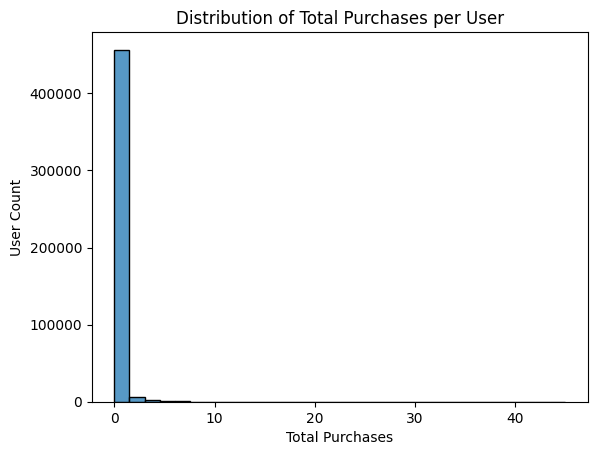

In [ ]:
sns.histplot(user_df['total_purchases'], bins=30)
plt.title("Distribution of Total Purchases per User")
plt.xlabel("Total Purchases")
plt.ylabel("User Count")
plt.show()

Not really surprising, but in average 1 users buys 0 times, most of the clients are viewers. We can see small amount of preople who buy 1 or more times, but 0 users that buy more then 10 times per week.

In other words, most users do not buy, while a small fraction make multiple purchases, it is a very common pattern in eCommerce, often called the “long-tail” behavior.

But now question arises: how much of the users are actually buying, carting and viewing in case of percentage?

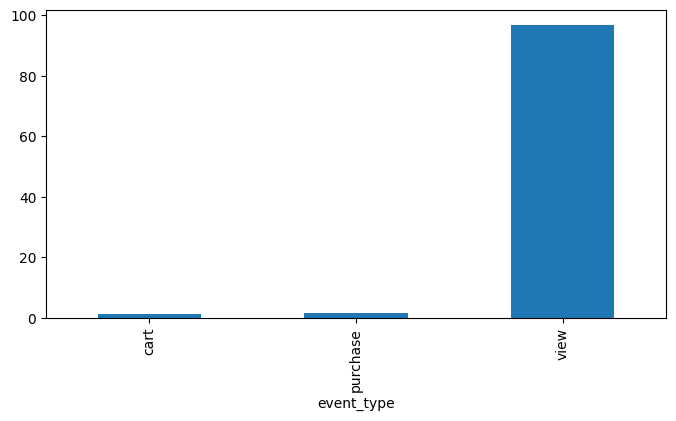

In [ ]:
event_counts = df_sampled.groupby("event_type").event_time.count()
event_percent = event_counts / event_counts.sum() * 100
event_percent.plot(kind="bar", figsize=(8, 4));

About 98–99% of all events in the data are view events. And only a tiny proportion (roughly 1% or less) are cart additions or purchases This highlights a common eCommerce funnel problem: many users look at products, but ery few actually cart or buy.

Now, let's look at those who actially buy and define how much they spend (top users).

<Axes: xlabel='user_id'>

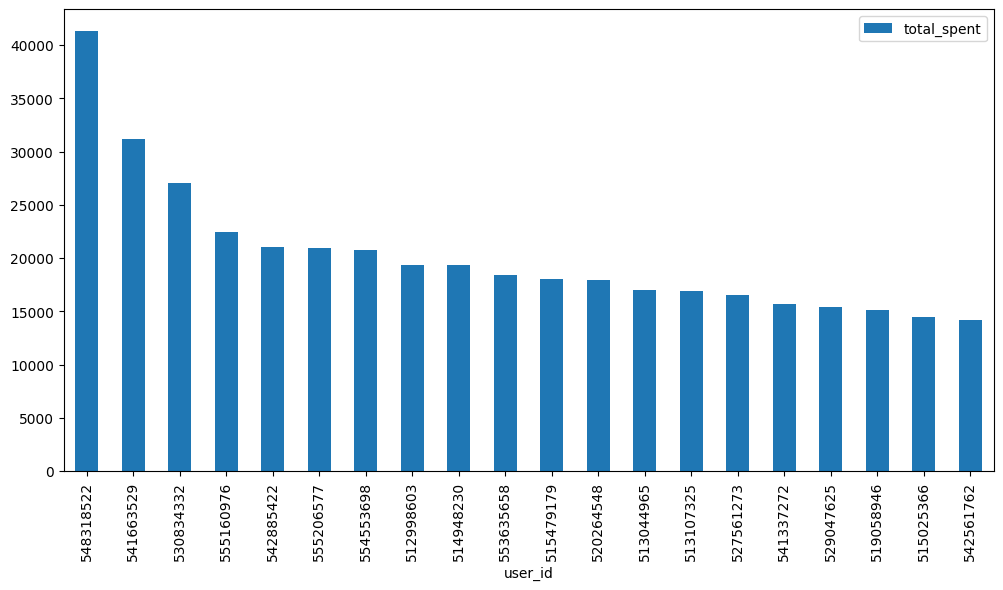

In [ ]:
user_df.dropna(subset=["avg_price_viewed", "avg_price_carted", "total_spent"]).sort_values(
    "total_spent", ascending=False).head(20).plot(kind="bar", x="user_id", y="total_spent", figsize=(12, 6))

We see that the top user alone spent over 40,000 units, with a sharp drop to the second highest spender, and then a gradual decline among the rest of the top 20. This highlights a classic long-tail or Pareto pattern, where a small group of customers drives the majority of revenue. These high-value users could be prioritized for targeted marketing or loyalty initiatives to maximize business impact.

**Features Distribution**

Then we went to look at some continuous features we have created, that would be good for understanding the data.

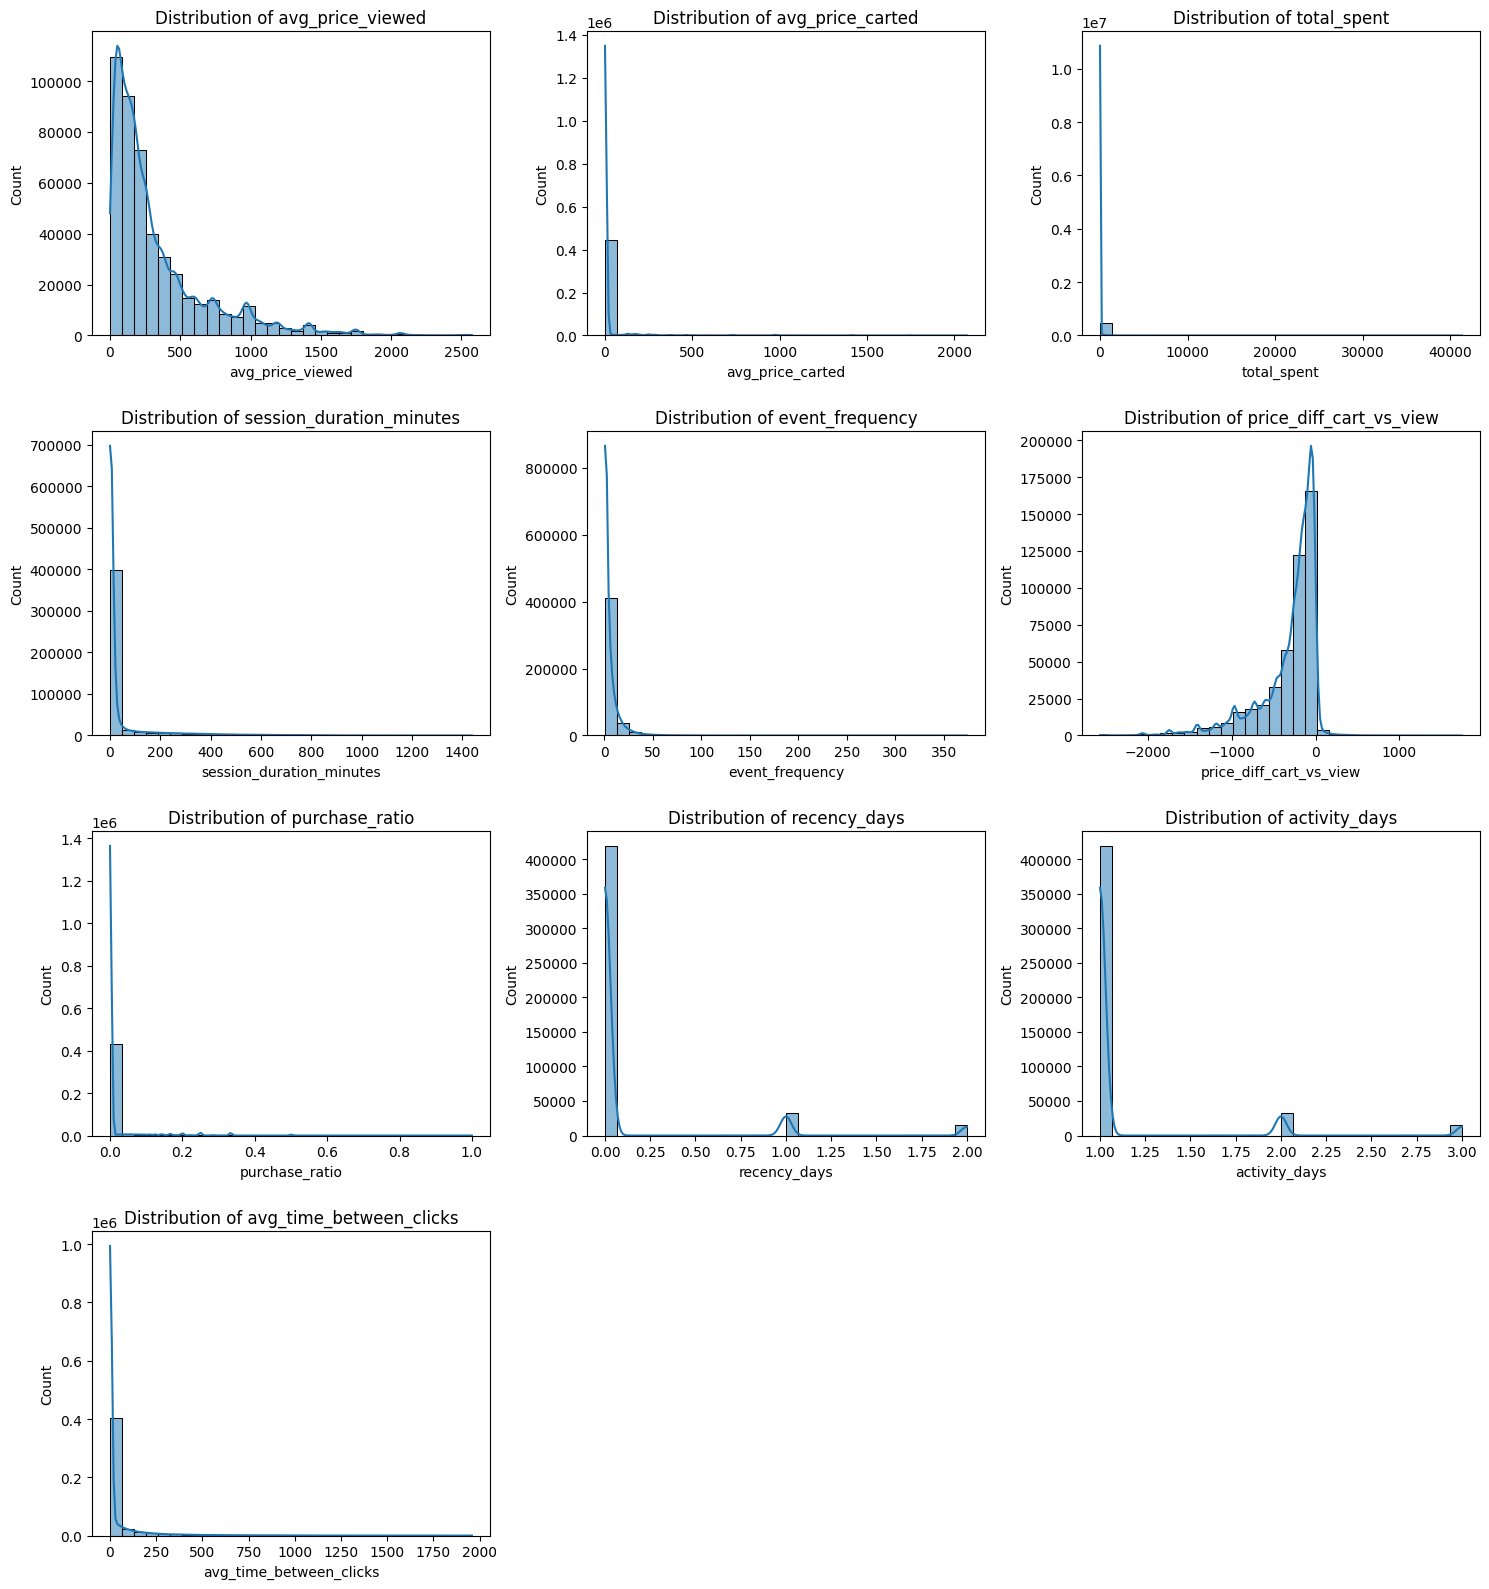

In [ ]:
continuous_features = [
    "avg_price_viewed",
    "avg_price_carted",
    "total_spent",
    "session_duration_minutes",
    "event_frequency",
    "price_diff_cart_vs_view",
    "purchase_ratio",
    "recency_days",
    "activity_days",
    "avg_time_between_clicks"]

#plot grid setup
n_cols = 3
n_rows = (len(continuous_features) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(continuous_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(user_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


Most users view relatively low-priced products, as shown by the right-skewed distribution of **average viewed prices**, while carted prices are nearly zero for most users, confirming low engagement with the cart.

**Total spending** is heavily concentrated at zero, with only a small minority spending significantly, revealing a strong long-tail pattern. **Session durations** are very short for most users, with only rare long sessions, and daily event frequency is similarly low, indicating that most users interact briefly and infrequently.

**The price difference between carted and viewed items** clusters around negative values, suggesting people often cart cheaper products. Purchase ratios are near zero for the overwhelming majority, showing minimal conversion.

Both recency and activity days are concentrated around one to two days, reflecting very short-lived user activity.

Finally, the average time between clicks is short for most users but has a long right tail, meaning some users click far apart in time. Overall, these patterns confirm that while browsing is widespread, meaningful engagement or purchasing is rare.

Now, lets look at the outliers, users with behaviour that is different from others.

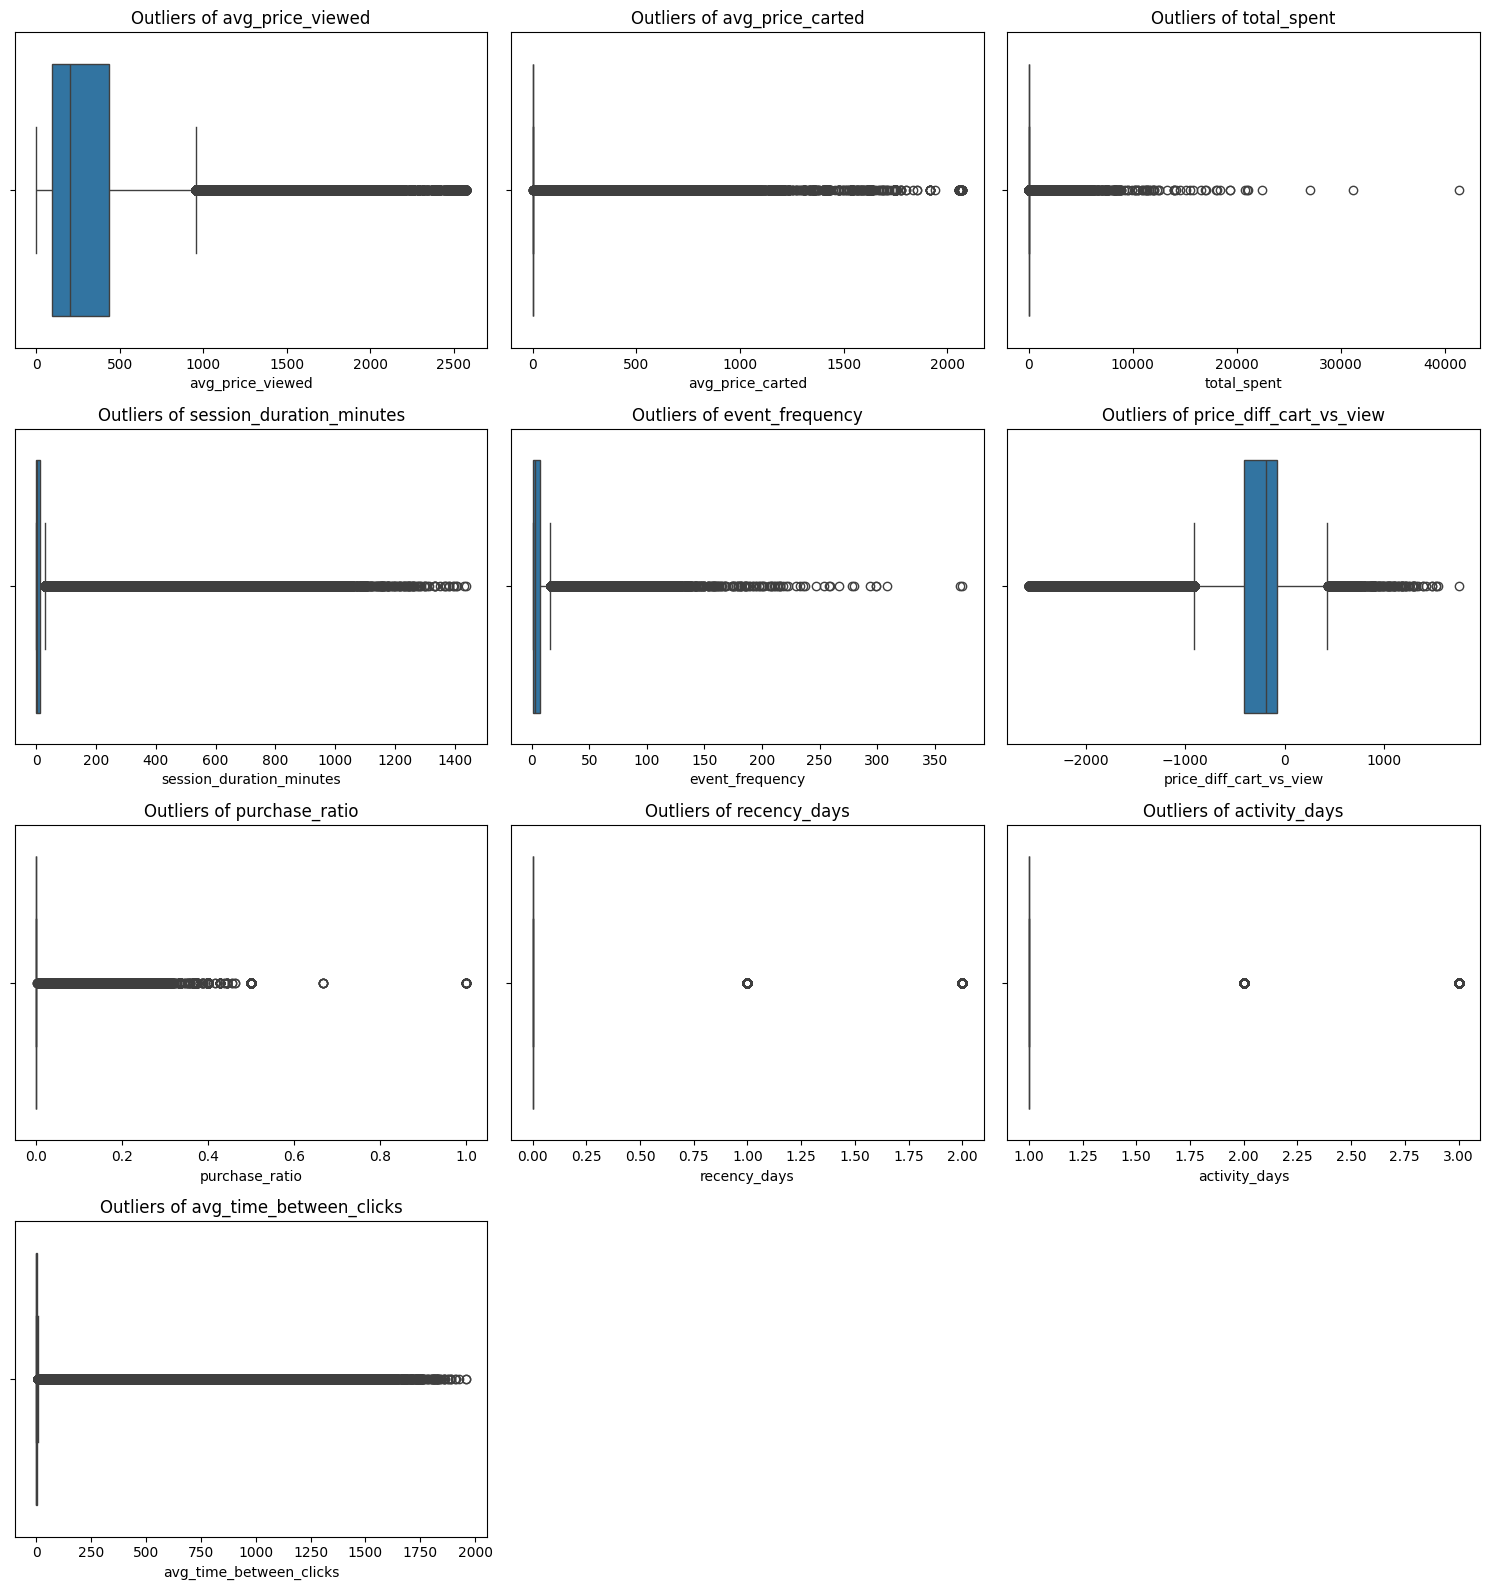

In [ ]:
n_cols = 3
n_rows = (len(continuous_features) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(continuous_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=user_df[col])
    plt.title(f"Outliers of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


Most of these boxplots show that the majority of users have very low values, while a small number of users have extremely high values. For example, most people view and cart cheap items and spend little, but a few spend a lot. Session times and time between clicks are short for almost everyone, with a few very long cases.

These “outliers” make sense in an online shop, where only a tiny group of customers buys or interacts a lot. They do not need to be removed, but it might be good to log-scale or cap them if you plan to build models later.

Now we also decided to look at the Corelation matrix.

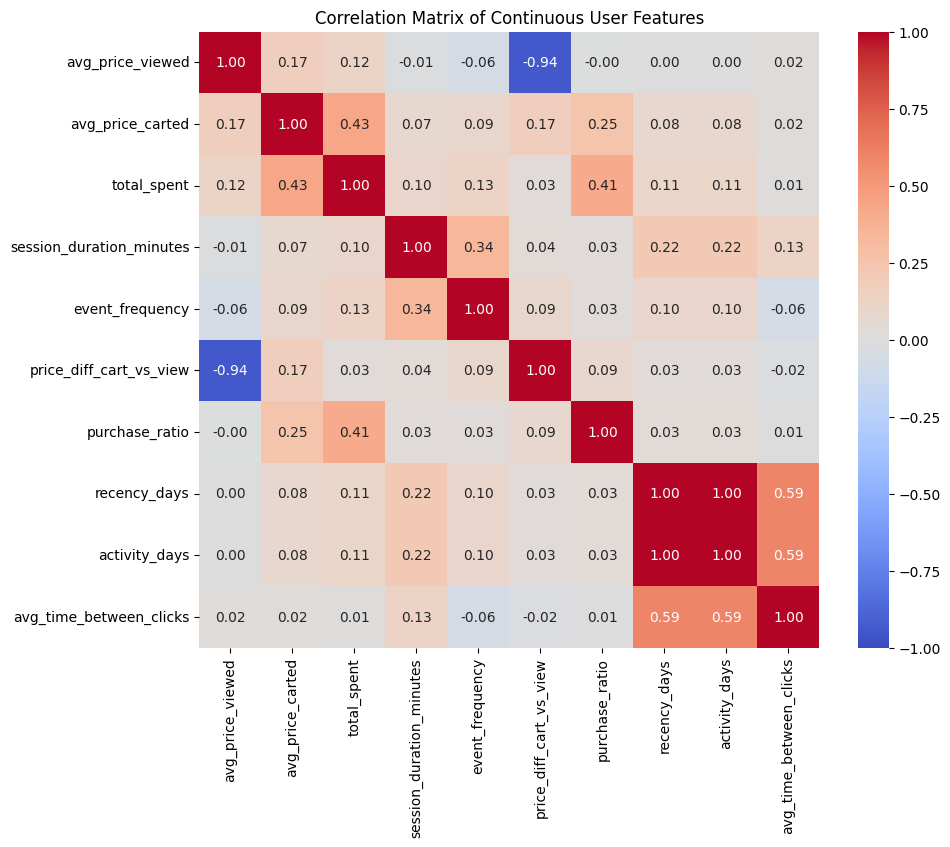

In [ ]:
corr_matrix = user_df[continuous_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Continuous User Features")
plt.show()

From the correlation heatmap above, we can see that most of the features are not strongly correlated, which is a good sign for regression modeling. However, there are a few exceptions to keep in mind:

* **avg_price_viewed** and **price_diff_cart_vs_view** show a very strong negative correlation (about -0.94), which could cause multicollinearity if included together in a regression.
* **avg_price_carted** and **total_spent** have a moderate positive correlation (0.43), which is logical since higher cart prices may translate into higher purchases.
* Other variables like **session duration, event frequency, recency, and activity** days have fairly low correlations with each other, which is helpful for keeping the regression model stable.

In general, the low to moderate correlations among most variables suggest we can include many of them in our regression models without worrying too much about multicollinearity, except for pairs** like avg_price_viewed** and **price_diff_cart_vs_view**, which we should handle carefully or drop one of them.

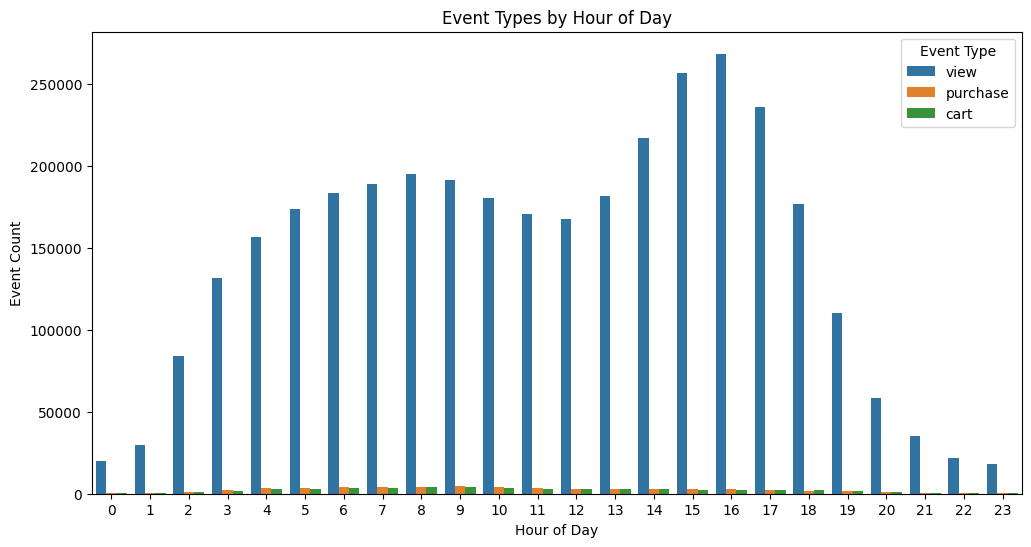

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df_sampled,
    x='hour_of_day',
    hue='event_type',
    order=range(24)
)
plt.title("Event Types by Hour of Day")
plt.ylabel("Event Count")
plt.xlabel("Hour of Day")
plt.legend(title="Event Type")
plt.show()


# **`STEP 3 Clustering`** (Yuliia Drevnytska 12420322)


---

For the clustering part I have come up with the following question, which would suit for our data and help us to look at the clients in general and those who are the buyers.

**How can we group users based on their shopping behavior (e.g., frequency of views, cart additions, and purchases), and what distinct customer personas emerge from these clusters?**

To see the clear picture step-by-step, I have divided the question into 4 main subquestions:

3.1 Can we identify distinct shopper personas (ex. window shoppers, cart abandoners, impulse buyers etc.)

3.2 How do these personas differ by product category preferences or average price points?

3.3 Are there differences in when and how often these groups shop?

3.4 Do patterns like repeat visits, short vs. long sessions, quick purchase decisions, or time between actions help distinguish these clusters?

## **`Clustering Setup`**




**Imports**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches


**Setup Part**

For clustering I would need only numeric features, so I create new features list expicitly for clustering, dropping user_id, because it's just an identifier, also  first_action and last_action, because timestamps cannot be directly interpreted by a distance algorithm.

In [ ]:
features_to_cluster = user_df[[
    'total_views', 'total_cart_additions', 'total_purchases',
    'num_events', 'activity_days', 'most_active_hour', 'event_frequency', 'weekend_activity_ratio',
    'cart_to_view_ratio', 'cart_to_purchase_ratio', 'purchase_to_view_ratio', 'purchase_to_cart_ratio',
    'avg_price_viewed', 'avg_price_carted', 'total_spent', 'price_diff_cart_vs_view',
    'num_categories', 'num_products_viewed',
    'recency_days', 'session_duration_minutes', 'days_since_last_action',
    'purchase_ratio'
]]

Also because KMeans are numeric value, we need to standardize the features.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_to_cluster)

To choose number of clusters, I will try several methods for easier understanding of the best.


In [ ]:
K_range = range(2, 9)
inertia = []
db_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    inertia.append(kmeans.inertia_)
    db = davies_bouldin_score(X_scaled, labels)
    db_scores.append(db)

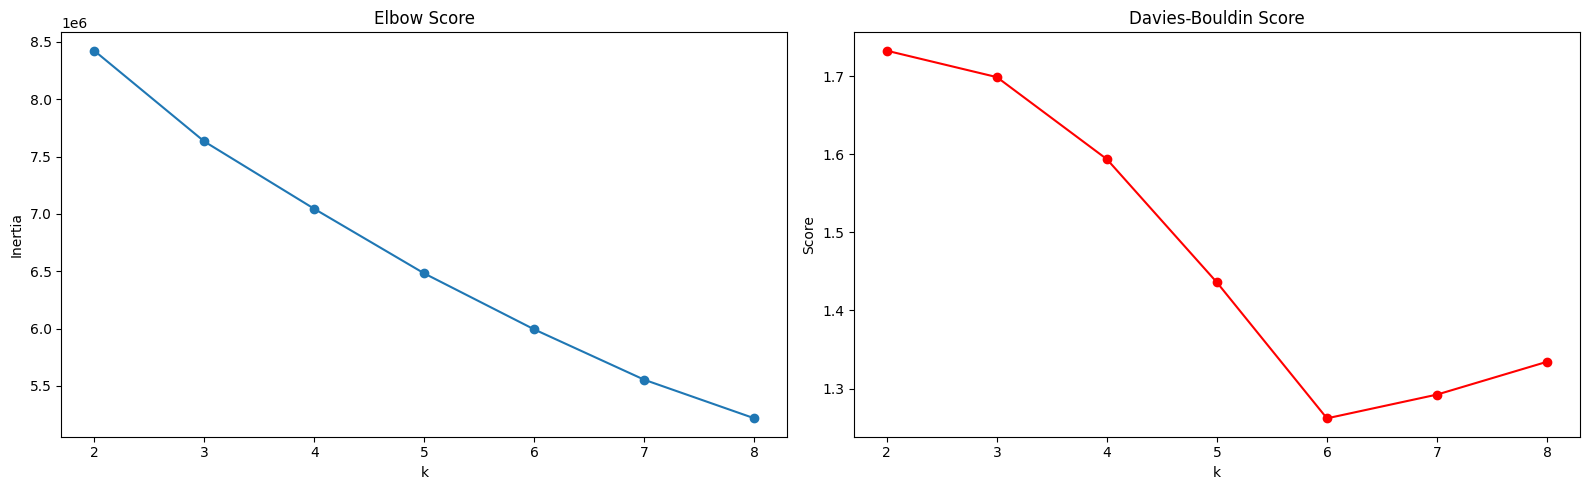

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Score")
plt.xlabel("k")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(K_range, db_scores, marker='o', color='red')
plt.title("Davies-Bouldin Score")
plt.xlabel("k")
plt.ylabel("Score")

plt.tight_layout()
plt.show()


We can see the big inertia drop between 2 and 4, so the best number of clusters to choose would be 4.
But if we also want to see the specific small clusters, we can try 5 as well. I will do both and see what works better for us.

From the Davies-Bouldin score we can see that k=6 works the best in this situation.

From that I have decided to try out 3 of those options k=4, k=5 and k=6


In [ ]:
kmeans4 = KMeans(n_clusters=4, random_state=42, n_init=10)
user_df['cluster_4'] = kmeans4.fit_predict(X_scaled)

In [ ]:
kmeans5 = KMeans(n_clusters=5, random_state=42, n_init=10)
user_df['cluster_5'] = kmeans5.fit_predict(X_scaled)

In [ ]:
kmeans6 = KMeans(n_clusters=6, random_state=42, n_init=10)
user_df['cluster_6'] = kmeans6.fit_predict(X_scaled)

In [ ]:
print(user_df['cluster_4'].value_counts())
print(user_df['cluster_5'].value_counts())
print(user_df['cluster_6'].value_counts())

cluster_4
1    320883
0     70765
3     44940
2     29965
Name: count, dtype: int64
cluster_5
1    316113
2     67800
0     37306
4     28282
3     17052
Name: count, dtype: int64
cluster_6
1    316016
0     67797
4     37299
5     28369
3     17041
2        31
Name: count, dtype: int64


We can see that using 5 clusters provides a more balanced segmentation. While Cluster 1 captures the dominant group of users (likely less engaged or inactive), the remaining clusters are reasonably sized and interpretable, avoiding extremely tiny or fragmented clusters like with 6. Looking at the elbow and Davies-Bouldin scores also supports 5 as a good choice, since the elbow curve flattens and the Davies-Bouldin score is near its minimum at 5. Overall, this makes 5 clusters a practical and coherent choice for profiling distinct customer personas going forward.


Then I also decided to see the percentages of all users each cluster takes.

In [ ]:
print(user_df['cluster_5'].value_counts())

cluster_5
1    316113
2     67800
0     37306
4     28282
3     17052
Name: count, dtype: int64


In [ ]:
counts = user_df['cluster_5'].value_counts()

percentages = counts / counts.sum() * 100

for cluster_id, pct in percentages.items():
    print(f"Cluster {cluster_id}: {pct:.1f}% of users")


Cluster 1: 67.8% of users
Cluster 2: 14.5% of users
Cluster 0: 8.0% of users
Cluster 4: 6.1% of users
Cluster 3: 3.7% of users


**The distribution of cluster sizes shows that:**

**Cluster 1** makes up about 68% of users, representing the largest segment, likely those with low or occasional activity.

**Cluster 2** covers around 14.5%, a moderate-sized group with possibly more engaged behavior.

**Cluster 0** includes about 8% of users, another significant persona.

**Clusters 3 and 4** are smaller, representing roughly 3–6% of the population, potentially niche or highly active customer groups.


/tmp/ipython-input-52-420603764.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', best_k)


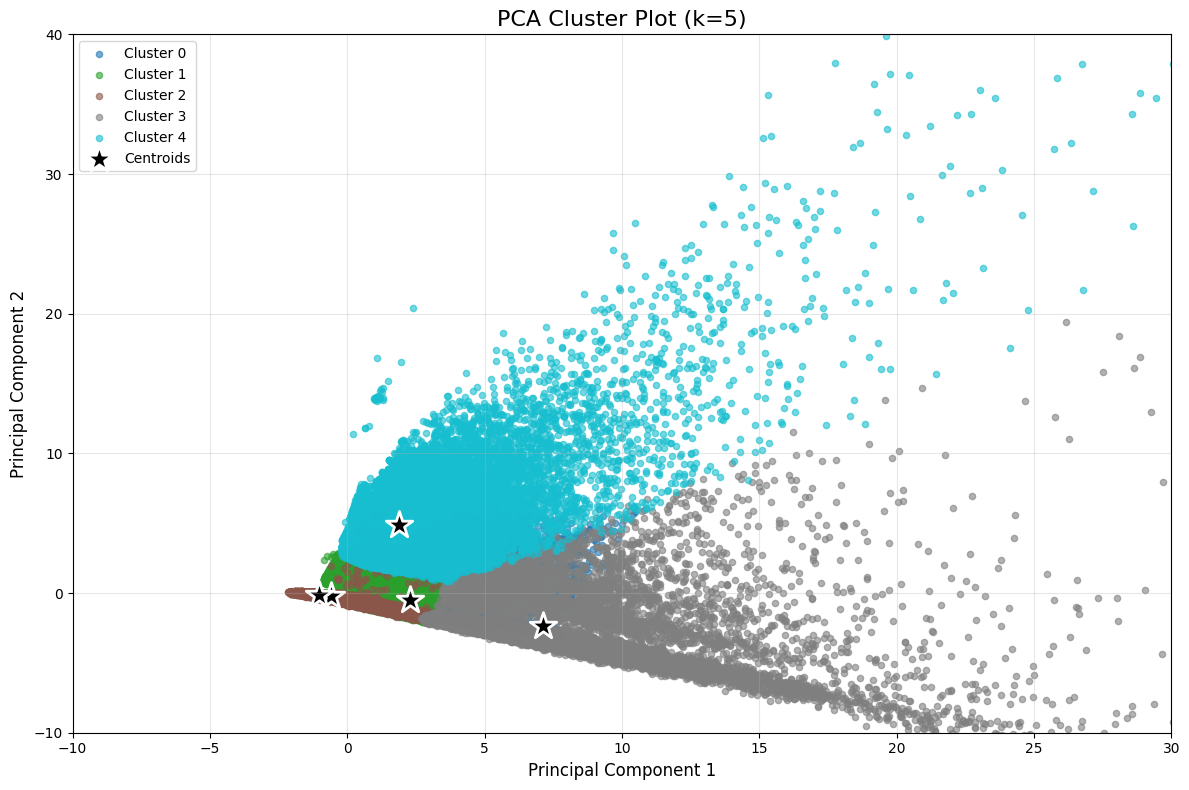

In [ ]:
best_k = 5

# fit KMeans with 5 clusters
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# do the centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)

# plot
plt.figure(figsize=(12, 8))
colors = cm.get_cmap('tab10', best_k)

for cluster_id in range(best_k):
    plt.scatter(
        X_pca[labels == cluster_id, 0],
        X_pca[labels == cluster_id, 1],
        s=20,
        color=colors(cluster_id),
        alpha=0.6,
        label=f"Cluster {cluster_id}"
    )

# plot centroids
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    s=400,
    c='black',
    marker='*',
    edgecolor='white',
    linewidth=2,
    label='Centroids'
)

plt.title(f"PCA Cluster Plot (k={best_k})", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(-10, 30)
plt.ylim(-10, 40)
plt.tight_layout()
plt.show()



When we look at the PCA projection, most users group fairly tightly, with the five clusters still separating out into their own regions even though there's some overlap, which is normal with behavioral data.

**Cluster 0** is close to the center (0,0), suggesting these are window shoppers or low-engagement users who hardly interact.

**Cluster 1** and **Cluster 2** spread more across PC1, which hints at more variety in their shopping, for example adding to cart or occasionally buying, but with inconsistent patterns.

**Cluster 3** stands out further on PC2, pointing to steady, higher purchasing activity and more consistent behavior.

**Cluster 4** moves upward on PC2, capturing users who browse a lot or revisit often, even if they don't buy as much.
The centroids (shown as stars) are fairly close together, which makes sense since user behavior naturally overlaps, but they're still separate enough to show distinct patterns.

Some points far from the main groups are likely rare “extreme” shoppers, either very active or almost inactive, but overall this visualization backs up the idea that five meaningful shopper segments really exist in the data.

Then let's also look at the inmportant information from each cluster summarizet to the table

In [ ]:
cluster_features = [
    "total_views", "total_cart_additions", "total_purchases",
    "avg_price_viewed", "avg_price_carted", "event_frequency",
    "session_duration_minutes", "recency_days", "num_categories"
]

# group by cluster
cluster_summary = user_df.groupby('cluster_5')[cluster_features].mean().round(2)

# display
import pandas as pd
pd.set_option('display.max_columns', None)
cluster_summary

cluster_summary_median = user_df.groupby('cluster_5')[cluster_features].median().round(2)
cluster_summary_median

,total_views,total_cart_additions,total_purchases,avg_price_viewed,avg_price_carted,event_frequency,session_duration_minutes,recency_days,num_categories
cluster_5,,,,,,,,,
0,11.0,0.0,0.0,229.02,0.0,5.0,12.79,1.0,2.0
1,3.0,0.0,0.0,154.19,0.0,3.0,1.67,0.0,1.0
2,2.0,0.0,0.0,939.54,0.0,2.0,0.92,0.0,1.0
3,44.0,0.0,0.0,195.33,0.0,35.0,125.54,0.0,3.0
4,5.0,0.0,1.0,253.02,0.0,6.0,7.15,0.0,1.0


**From the summary table, we can see:**

**Cluster 0:** Moderate views, relatively low event frequency, and modest session duration, these might be casual browsers with occasional interest.

**Cluster 1:** Very low engagement across the board, short sessions, and low event frequency, representing inactive or one-time visitors.

**Cluster 2:** Also low views but higher average prices viewed, suggesting they might be premium-oriented but passive or cautious.

**Cluster 3:** Very high views, high event frequency, and long session durations, exploring across more categories — likely enthusiastic explorers or window shoppers.

**Cluster 4:** Moderate engagement but with at least some purchase activity, showing they could be a small but valuable group of active buyers.

## **`Cluster Profiling`**

### 3.1 Can we identify distinct shopper personas (ex. window shoppers, cart abandoners, impulse buyers etc.)

Now, we need to do profiling and understang who is in which group

In [ ]:
cluster_profiles = user_df.groupby('cluster_5').mean()
print(cluster_profiles)

                user_id  total_views  total_cart_additions  total_purchases  \
cluster_5                                                                     
0          5.293559e+08    13.941752              0.138932         0.117515   
1          5.347138e+08     4.891786              0.027313         0.012290   
2          5.339130e+08     3.727404              0.000885         0.001888   
3          5.304140e+08    53.895144              0.278442         0.323716   
4          5.340381e+08     7.538045              1.171805         1.559720   

           num_events  activity_days  most_active_hour  event_frequency  \
cluster_5                                                                 
0           14.198199       2.328071         10.606685         6.170942   
1            4.931388       1.000000         10.688225         4.931388   
2            3.730177       1.013097         11.027050         3.693038   
3           54.497302       1.429979         12.260791        40.576951

In [ ]:
print(cluster_profiles[['total_views', 'total_cart_additions', 'total_purchases',
                        'event_frequency', 'session_duration_minutes', 'purchase_ratio']])

           total_views  total_cart_additions  total_purchases  \
cluster_5                                                       
0            13.941752              0.138932         0.117515   
1             4.891786              0.027313         0.012290   
2             3.727404              0.000885         0.001888   
3            53.895144              0.278442         0.323716   
4             7.538045              1.171805         1.559720   

           event_frequency  session_duration_minutes  purchase_ratio  
cluster_5                                                             
0                 6.170942                 97.789037        0.007501  
1                 4.931388                 29.379740        0.000887  
2                 3.693038                 24.637520        0.000164  
3                40.576951                224.444072        0.005522  
4                 8.754838                 73.496995        0.201981  


**Cluster Profiles**

**Cluster 0 (Passive Browsers)**

Total views ~14, barely any carts (0.14) or purchases (0.12), purchase ratio ~0.0075. Event frequency moderate (6.2), with average session duration of ~98 minutes.

**Description:** They browse moderately, rarely add to cart or buy, and have decent session times, but lack real commitment to purchase.

**Cluster 1 (Low-Engagement Visitors)**

Total views ~4.9, extremely low cart additions (0.03) and purchases (0.01), purchase ratio ~0.0009. Event frequency ~4.9, with ~29 minute sessions on average.

**Description:** These visitors show minimal interest, hardly interact, and leave fairly quickly.

**Cluster 2 (Window shopper)**

Total views ~3.7, basically zero carts and purchases, purchase ratio ~0.0002. Low event frequency (3.7), short session duration of ~25 minutes.

**Description:** Passive scrollers who barely engage or explore, and never buy.

**Cluster 3 (Active Explorers)**

Total views ~54, moderate carts (0.28) and purchases (0.32), purchase ratio ~0.0055. High event frequency (40.5) and long sessions averaging ~224 minutes.

**Description:** Actively exploring, repeatedly engaging with products, but convert modestly relative to their high activity.

**Cluster 4 (Frequent Buyers)**

Total views ~7.5, high cart additions (1.17) and high purchases (1.56), purchase ratio ~0.20. Event frequency ~8.8, with ~73 minute sessions.

**Description:** These are decisive, loyal buyers who engage a bit less frequently but convert strongly when they do — the most valuable group to target.

**Visualization of profiles**

Then, I have decided to vizualize our clusters, to see which cluster is highest on purchasing, which has longest sessions and which is basically inactive. For that I need to first scale them, so all the values 0 or 1.

In [ ]:
features_to_plot = ['total_views', 'total_cart_additions', 'total_purchases',
                    'purchase_ratio', 'session_duration_minutes', 'event_frequency']

scaler = MinMaxScaler()
scaled = scaler.fit_transform(cluster_profiles[features_to_plot])

scaled_profiles = pd.DataFrame(
    scaled,
    columns=features_to_plot,
    index=cluster_profiles.index
)


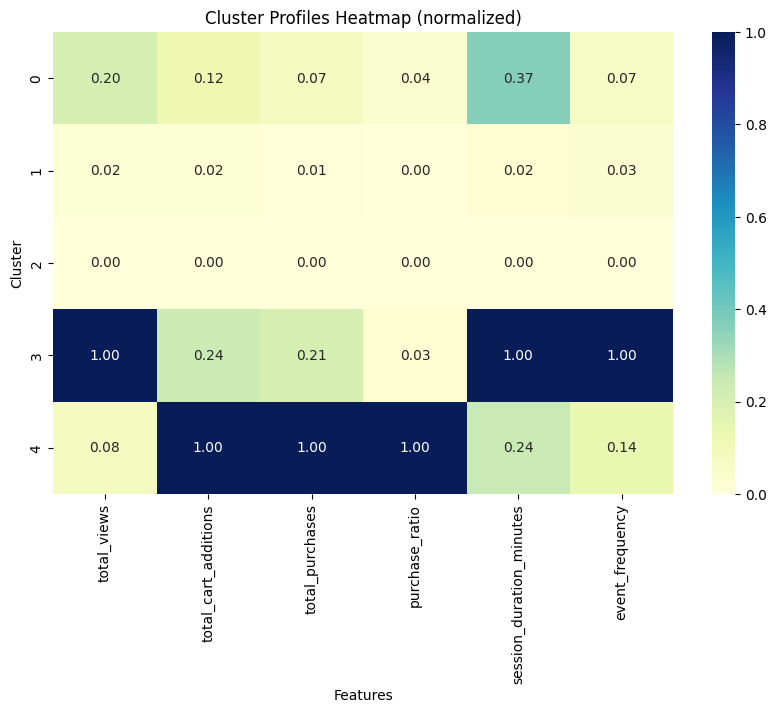

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(scaled_profiles, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Cluster Profiles Heatmap (normalized)")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

The heatmap highlights clear differences in shopping patterns across the five user clusters.

**Cluster 0 (Passive Browsers):** Shows moderate views but minimal cart or purchase activity, with a very low purchase ratio. Their event frequency is moderate and their session durations are reasonable, suggesting they browse somewhat consistently but rarely commit to buying.

**Cluster 1 (Low-Engagement Visitors):** Displays low views, almost no carting or purchases, and a near-zero purchase ratio. Their event frequency and session times are low as well, indicating minimal interest and a tendency to leave quickly.

**Cluster 2 (Window Shoppers):** Very low views, essentially no carts or purchases, and an extremely low purchase ratio. Their short session durations and low event frequency point to quick, passive visits without meaningful interaction.

**Cluster 3 (Active Explorers):** Stands out with the highest views, moderate cart additions and purchases, and modest purchase ratio. Their high event frequency and long session durations suggest repeated, engaged exploration, even if conversion is moderate.

**Cluster 4 (Frequent Buyers):** Shows good views, high cart activity, and the highest purchase ratio. Their balanced session durations and steady event frequency confirm them as loyal, high-value customers who reliably convert.


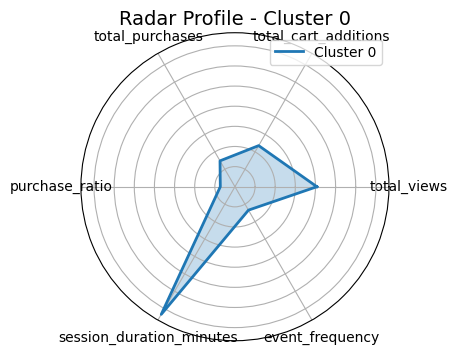

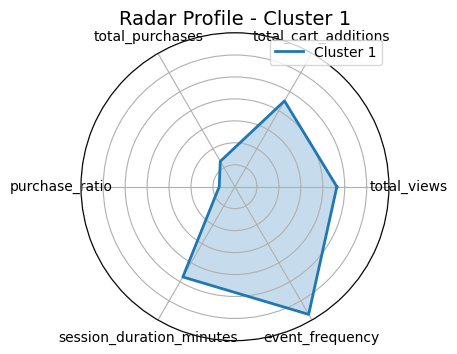

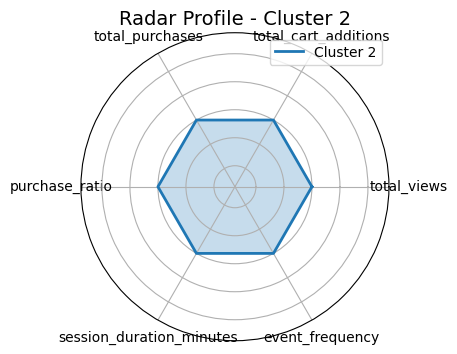

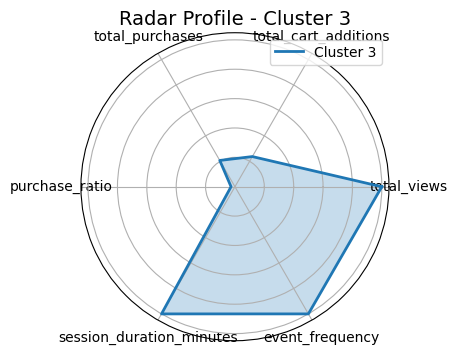

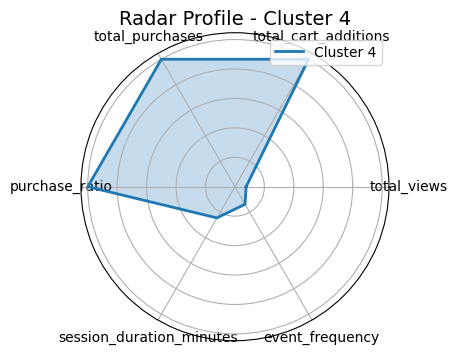

In [ ]:
features_to_plot = ['total_views', 'total_cart_additions', 'total_purchases',
                    'purchase_ratio', 'session_duration_minutes', 'event_frequency']

# angles for radar
num_vars = len(features_to_plot)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the circle

# plot for each cluster
for cluster_id in scaled_profiles.index:
    values = scaled_profiles.loc[cluster_id, features_to_plot].tolist()
    values += values[:1]  # close circle

    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))

    ax.plot(angles, values, linewidth=2, label=f"Cluster {cluster_id}")
    ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features_to_plot, fontsize=10)
    ax.set_yticklabels([])
    ax.set_title(f"Radar Profile - Cluster {cluster_id}", size=14)
    plt.legend(loc='upper right')
    plt.show()


**Radar Plot Insights**

**Cluster 0 (Passive Browsers):** Moderate views and session times, but almost no carts or purchases; engagement stays low with minimal purchasing intent.

**Cluster 1 (Low-Engagement Visitors):** Consistently low across all dimensions — very few views, carts, or purchases, with shorter sessions and weak engagement.

**Cluster 2 (Window Shoppers):**Low views, barely any carts or purchases, and very low event frequency, suggesting they scroll without exploring or committing.

**Cluster 3 (Active Explorers):** High views, high event frequency, and long sessions; moderate cart and purchase activity indicates curious but only partly converting visitors.

**Cluster 4 (Frequent Buyers):** Strong performance across purchases, purchase ratio, and cart additions, with stable viewing and session duration; loyal and highly engaged buyers.

These radar charts reinforce the earlier heatmap findings, validating the presence of five distinct user personas with clear behavioral differences.

## **`Category & Price Analysis`**




### 3.2 How do these personas differ by product category preferences and average price points?

I have started with identifiyng users most common product category, in what user most frequently interacted with, whether by: viewing adding to cart or purchasing.

In [ ]:
# get each user’s most frequent category (but we have unknown, so idk what to do and if it is right to leave it, or should i try to fill with second most common)
user_top_category = (
    df_sampled.groupby(['user_id', 'category_code'])
    .size()
    .reset_index(name='counts')
    .sort_values(['user_id', 'counts'], ascending=[True, False])
    .drop_duplicates('user_id')
    .rename(columns={'category_code': 'most_common_category'})
    [['user_id', 'most_common_category']]
)



In [ ]:
#so, basically I had a category, that is named unknown, as there were nans and we changed them for "unknown", but for analysis i would rather use real categories, so second or third known one, and then if nothing found - "unknown"
valid_categories = (
    user_top_category[user_top_category['most_common_category'] != 'unknown']
    .groupby('user_id')['most_common_category']
    .first()
    .reindex(user_top_category['user_id'].unique(), fill_value='unknown')
    .to_dict()
)

In [ ]:
user_top_category = pd.DataFrame.from_dict(
    valid_categories, orient='index', columns=['most_common_category']
).reset_index().rename(columns={'index': 'user_id'})

In [ ]:
user_df = user_df.drop(columns=['most_common_category'], errors='ignore').merge(
    user_top_category, on='user_id', how='left'
)

In [ ]:
user_df.head()

,user_id,total_views,total_cart_additions,total_purchases,num_events,activity_days,most_active_hour,event_frequency,weekend_activity_ratio,cart_to_view_ratio,cart_to_purchase_ratio,purchase_to_view_ratio,purchase_to_cart_ratio,avg_price_viewed,avg_price_carted,total_spent,price_diff_cart_vs_view,num_categories,num_products_viewed,first_action,last_action,recency_days,session_duration_minutes,days_since_last_action,purchase_ratio,avg_time_between_clicks,cluster_4,cluster_5,cluster_6,most_common_category
0,183503497,1,0,0,1,1,21,1.0,0.0,0.0,0.0,0.0,0.0,15.770000,0.0,0.0,-15.770000,1,1,2019-10-02 21:43:00+00:00,2019-10-02 21:43:00+00:00,0,0.000000,2094,0.0,0.000000,1,1,1,unknown
1,241587569,1,0,0,1,1,11,1.0,0.0,0.0,0.0,0.0,0.0,130.250000,0.0,0.0,-130.250000,1,1,2019-10-02 11:28:14+00:00,2019-10-02 11:28:14+00:00,0,0.000000,2094,0.0,0.000000,1,1,1,electronics.smartphone
2,244951053,5,0,0,5,2,3,2.5,0.0,0.0,0.0,0.0,0.0,759.712000,0.0,0.0,-759.712000,1,3,2019-10-01 08:47:35+00:00,2019-10-03 03:08:27+00:00,1,1.516667,2093,0.0,508.173333,0,0,4,electronics.smartphone
3,255544096,6,0,0,6,1,15,6.0,0.0,0.0,0.0,0.0,0.0,215.241667,0.0,0.0,-215.241667,1,3,2019-10-02 15:42:19+00:00,2019-10-02 15:45:30+00:00,0,3.183333,2094,0.0,0.530556,1,1,1,unknown
4,260013793,23,0,0,23,1,17,23.0,0.0,0.0,0.0,0.0,0.0,23.672609,0.0,0.0,-23.672609,1,22,2019-10-01 17:45:30+00:00,2019-10-01 18:00:44+00:00,0,15.233333,2095,0.0,0.662319,1,1,1,unknown


### **Category Preferences**

To look at the questions, I look at categories that dominate for the cluster and pricing preferences separately. So, here I start with Category Preferences

In [ ]:
category_counts_by_cluster = (
    user_df.groupby(['cluster_5', 'most_common_category'])
    .size()
    .reset_index(name='counts')
    .sort_values(['cluster_5', 'counts'], ascending=[True, False])
)

In [ ]:
for cluster_id in category_counts_by_cluster['cluster_5'].unique():
    print(f"\nCluster {cluster_id} Top Categories:")
    print(category_counts_by_cluster[category_counts_by_cluster['cluster_5'] == cluster_id].head(5))


Cluster 0 Top Categories:
     cluster_5         most_common_category  counts
87           0       electronics.smartphone   12725
116          0                      unknown   11035
86           0           electronics.clocks    1497
80           0  electronics.audio.headphone    1481
63           0           computers.notebook     903

Cluster 1 Top Categories:
     cluster_5         most_common_category  counts
240          1                      unknown  112309
211          1       electronics.smartphone   77005
204          1  electronics.audio.headphone   12984
210          1           electronics.clocks   12958
215          1         electronics.video.tv    6159

Cluster 2 Top Categories:
     cluster_5    most_common_category  counts
317          2  electronics.smartphone   46614
343          2                 unknown    7156
296          2      computers.notebook    4086
316          2      electronics.clocks    2184
321          2    electronics.video.tv    1202

Cluster 3 To

**Category & Price Analysis**

**Cluster 0 (Passive Browsers):**
Primarily interested in electronics.smartphones, with some presence in clocks, headphones, and notebooks. A significant minority still have “unknown” as their most common category, but overall this group browses popular electronics without much purchasing intent.

**Cluster 1 (Low-Engagement Visitors):**
A very large share remains “unknown,” showing irregular and fragmented browsing. Among those with clear preferences, smartphones, headphones, clocks, and TVs are the top categories. These users have scattered, low-engagement patterns without consistent product focus.

**Cluster 2 (Window Shoppers):**
Clearly concentrated on electronics.smartphones, with secondary interest in notebooks, clocks, and TVs. While a portion still has “unknown” as their most common category, the overall behavior shows a targeted but non-committing browsing style.

**Cluster 3 (Active Explorers):**
Most common categories include electronics.smartphones, notebooks, clocks, and a small share of apparel (e.g., shoes). This cluster covers a broader range of categories, exploring more actively across sessions, but still with moderate conversion to purchase.

**Cluster 4 (Frequent Buyers):**
Dominated by electronics.smartphones and supported by headphones, TVs, and clocks. Although there is still some “unknown” category present, these users show high engagement with electronics and stronger follow-through to actual purchases.

**Vizalization of Categories**

Then I have decided to vizualize it all, grouping into bigger categories


In [ ]:
# pivot to wide format
category_pivot = category_counts_by_cluster.pivot(
    index='cluster_5',
    columns='most_common_category',
    values='counts'
).fillna(0)

# normalize to percentages
category_pivot_percent = category_pivot.div(category_pivot.sum(axis=1), axis=0)


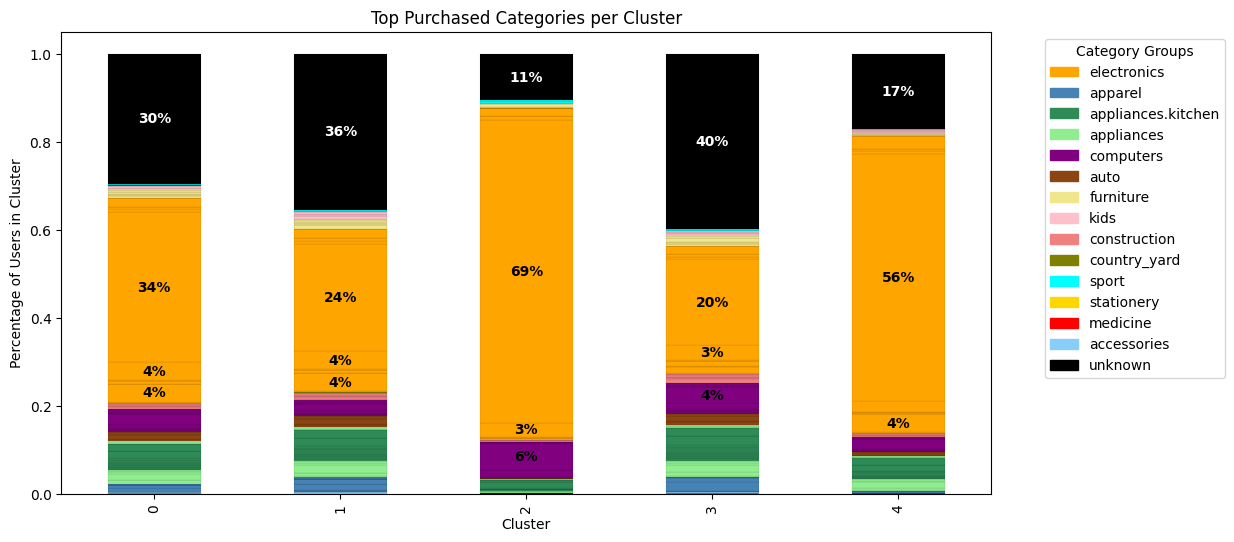

In [ ]:
# define group-level colors (feel free to adjust!)
group_colors = {
    "electronics": "orange",
    "apparel": "steelblue",
    "appliances.kitchen": "seagreen",
    "appliances": "lightgreen",
    "computers": "purple",
    "auto": "saddlebrown",
    "furniture": "khaki",
    "kids": "pink",
    "construction": "lightcoral",
    "country_yard": "olive",
    "sport": "cyan",
    "stationery": "gold",
    "medicine": "red",
    "accessories": "lightskyblue",
    "unknown": "black"
}

# map colors per column based on prefix
category_columns = category_pivot_percent.columns.tolist()
color_map = {}

for cat in category_columns:
    found = False
    for prefix, color in group_colors.items():
        if cat.lower().startswith(prefix.lower()):
            color_map[cat] = color
            found = True
            break
    if not found:
        color_map[cat] = "gray"

ordered_colors = [color_map[c] for c in category_columns]

category_pivot_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    color=ordered_colors,
    edgecolor='black',
    linewidth=0.05)

plt.title("Top Purchased Categories per Cluster")
plt.ylabel("Percentage of Users in Cluster")
plt.xlabel("Cluster")

legend_handles = []
for group, color in group_colors.items():
    patch = mpatches.Patch(color=color, label=group)
    legend_handles.append(patch)

plt.legend(
    handles=legend_handles,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    title="Category Groups")

ax = plt.gca()
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0.03:  # only label if >3% of cluster
            label = f"{height*100:.0f}%"
            text_color = "white" if bar.get_facecolor()[0:3] < (0.5, 0.5, 0.5) else "black"
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                label,
                ha="center",
                va="center",
                fontsize=10,
                color=text_color,
                fontweight="bold")

plt.show()


**Interpretation of Top Purchased Categories per Cluster**

**Cluster 0 (Passive Browsers):**
About 30% of users in this cluster have unknown preferences, while roughly 42% focus on technology (electronics, computers, appliances combined). The rest is spread among smaller household and apparel categories. Overall, these users browse technology products but rarely convert to purchases.

**Cluster 1 (Low-Engagement Visitors):**
This group shows 36% unknown, with about 32% displaying technology interest. The rest is widely fragmented across minor categories. These visitors have shallow, inconsistent browsing patterns without a clear focus.

**Cluster 2 (Window Shoppers):**
Strongly dominated by technology, with 78% of users in electronics, computers, or appliances. Only 11% remain unknown. This group shows clear interest in tech products but usually stops short of completing purchases.

**Cluster 3 (Active Explorers):**
This cluster has the highest share of unknown users (nearly 40%), but also a significant electronics segment (about 27%), plus notable engagement with computers, appliances, and even some apparel. These users display broader and more diverse category interactions, indicating exploratory shopping behavior across multiple sessions.

**Cluster 4 (Frequent Buyers):**
Electronics categories dominate strongly here, representing around 60% of the cluster. About 17% remain unknown, with smaller shares across apparel, computers, and kitchen products. This group combines repeated engagement in high-value electronics with more decisive purchases, aligning with a “frequent buyer” persona.

### **Price Preferences**

Basically to see the price preferences, we would need to answer several questions, specificallly:

* Which clusters buy more expensive products?

* Which clusters view expensive vs. cheap products?

* Do some clusters only window-shop for luxury items while others buy mid-range?

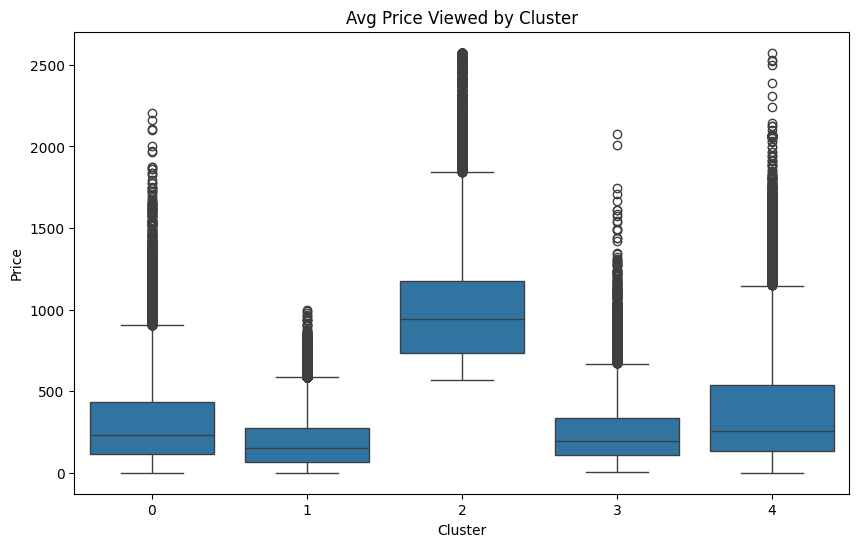

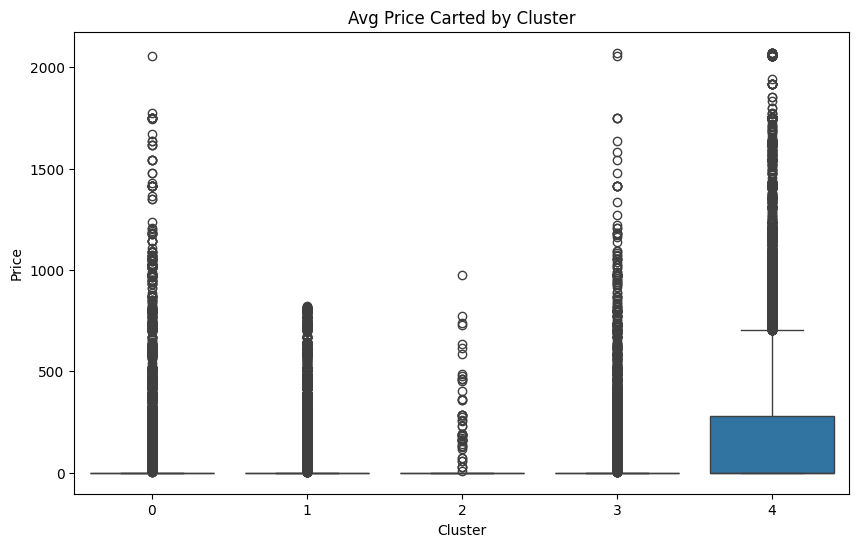

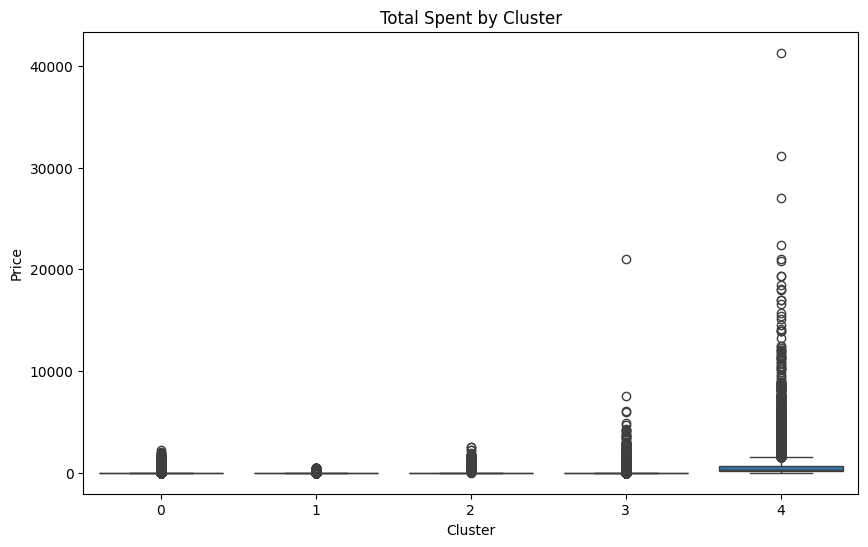

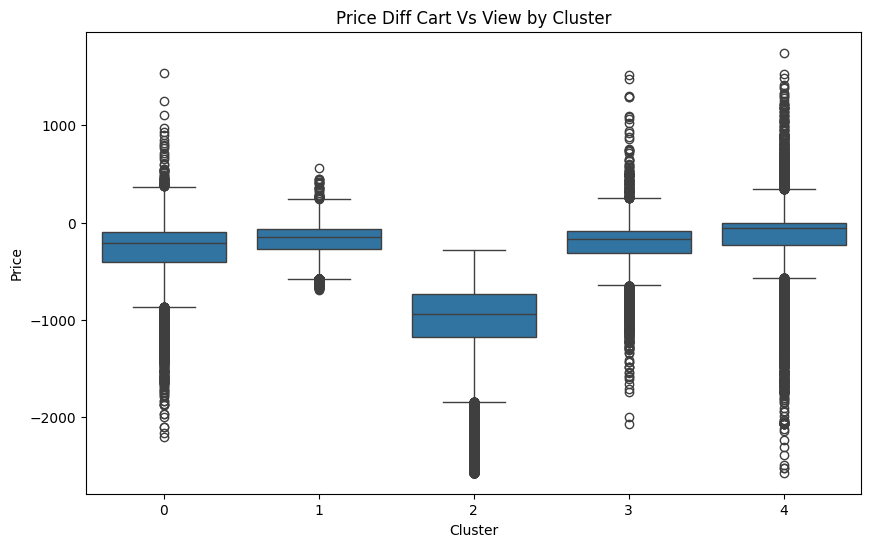

In [ ]:
#lets work on price_features that exist

price_features = ['avg_price_viewed', 'avg_price_carted', 'total_spent', 'price_diff_cart_vs_view']

#and do the boxplots for each

for feature in price_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=user_df,
        x='cluster_5',
        y=feature
    )
    plt.title(f"{feature.replace('_', ' ').title()} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Price")
    plt.show()

**Implementation of the Boxplots**

**Avg Price Viewed by Cluster**

Cluster 2 shows the highest median viewed prices (center around 1200–1500), with a wide spread — these are the “luxury window shoppers” looking at expensive items.
Cluster 4 also views relatively higher prices than 0, 1, or 3.
Clusters 0 and 1 view more affordable items on average (median below 500).

**Conclusion:** Cluster 2 is the clear luxury browser, Cluster 4 follows, the rest look at cheaper goods.

**Avg Price Carted by Cluster**

Most clusters have low or near-zero medians, meaning they rarely add products to cart, except Cluster 4 which carts higher-priced products (median around 500, with some carts above 1500).

**Conclusion:** Cluster 4 is the only group consistently putting higher-priced items in the cart.

**Total Spent by Cluster**

Cluster 4 stands out dramatically, median spending is clearly higher, with outliers spending 20,000+
The other clusters have median total spending close to zero (very rare purchases).

**Conclusion:** Cluster 4 are the true buyers, with significant spending.

**Price Diff Cart vs. View by Cluster**

Generally centers around zero in most clusters, but with a negative median for Cluster 2, meaning they tend to downgrade from what they view to what they cart.

Cluster 4 stays closer to zero or positive, indicating they cart items roughly at the same price as what they view, showing more consistent intent.

**Conclusion:** Cluster 2 tends to downgrade their price between viewing and carting, while Cluster 4 stays steady.

But as Total Spent by Cluster wasn't visible enough, I have decided to do it as a Log scale, to see the clear differences

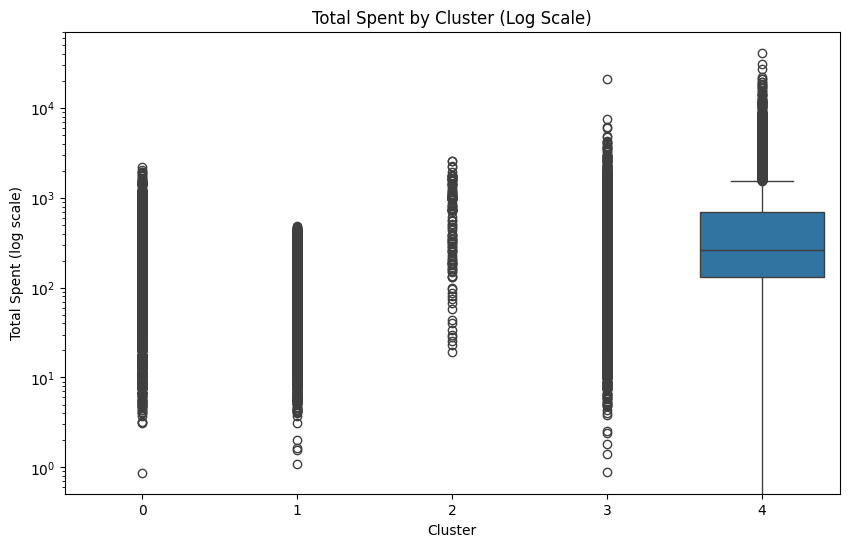

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=user_df,
    x='cluster_5',
    y='total_spent'
)
plt.yscale('log')
plt.title("Total Spent by Cluster (Log Scale)")
plt.ylabel("Total Spent (log scale)")
plt.xlabel("Cluster")
plt.show()

**Total Spent by Cluster (Log Scale)**

**Cluster 4** shows a dramatically higher median total spending compared to all other clusters, with a consistent spread reaching up to 10,000 and beyond. This confirms that Cluster 4 represents high-value buyers who repeatedly make significant purchases.

**Clusters 0, 1, 2, and 3** display extremely low median total spending, barely above 1 on the log scale, meaning most users in these clusters rarely complete purchases. Occasional outliers do make larger purchases, but these are exceptions rather than the rule.

The log scale reveals that even the lower-spending clusters have isolated high-spend outliers, yet Cluster 4's distribution is clearly separated, showing a higher baseline spending pattern rather than a few random big-ticket buyers.

**Conclusion:** Cluster 4 is by far the strongest group in terms of actual monetary conversion, supporting its profile as the most valuable segment for the business.

**Price Preferences: Key Questions Answers**

* Which clusters buy more expensive products?

**Cluster 4 clearly buys more expensive products.** Its avg_price_carted boxplot shows a higher median compared to the other clusters, and the total_spent boxplot confirms significantly higher spending with a wider spread.

All other clusters (0, 1, 2, 3) have very low median cart prices and total spending close to zero, indicating almost no high-priced purchasing.


* Which clusters view expensive vs. cheap products?

**Cluster 2** prefers to explore expensive products but does not necessarily buy them, while Cluster 4 views moderately expensive products and follows through to purchase.

* Do some clusters only window-shop for luxury items while others buy mid-range?

**Cluster 2** is a textbook “luxury window shopper” - high avg_price_viewed but low avg_price_carted and minimal total_spent, indicating little purchase activity despite an interest in expensive items.
Cluster 4 tends to view moderately expensive items and then actually purchases them, showing consistent intent and action.

So, let's move to the question being asked, **How do these personas differ by product category preferences or average price points?**

The identified customer personas show clear differences in both category preferences and average price points.

**Cluster 0 (Passive Browsers)** mostly explores technology products (42% focus) but with 30% unknown preferences and generally low purchasing follow-through, reflecting a passive browsing style.
**Cluster 1 (Low-Engagement Visitors)** shows 36% unknown category share and fragmented activity across cheaper technology and household categories, with low, inconsistent purchasing behavior.
**Cluster 2 (Window Shoppers)** strongly focuses on expensive electronics, computers, or appliances (78%), with a high median price viewed, but does not follow through with carts or purchases, reflecting a classic luxury window-shopper persona.

**Cluster 3 (Active Explorers)** demonstrates broader and more diverse exploration, with 40% unknown preferences, around 27% in technology, and small shares in apparel and household items. They explore actively but convert only moderately to purchases.

**Cluster 4 (Frequent Buyers)** stands out as the most valuable segment, with 60% technology preference, higher median price viewed, higher cart price, and the highest total spending. Their consistent engagement with high-value electronics and more decisive buying patterns make them the most critical target group.

Overall, these patterns show how product category choices and price behaviors together reveal distinct personas, from passive browsers and window-shoppers to frequent, high-value buyers.


## **`Temporal Patterns`**



### 3.3 Are there differences in when and how often these groups shop?

To understand the temporal patterns, it would be essentioal to break down the questions to "when" and "how often". So, that's why I need to investigate most active hour per cluster, also distribution of active days of the week, bur also event frequency and session count per user.

First, I check how many days people actually shopped, then  average events per day frequency and most active hours of the clients.

However, since the data is sampled due to large dataframe, the results will be shown in one weeek perspective and explained as well.

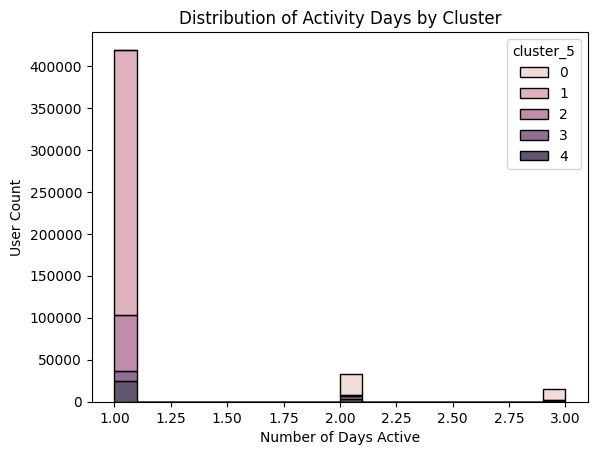

In [ ]:
# looking at the features
timing_features = [
    'activity_days',
    'weekend_activity_ratio',
    'event_frequency']

# ACTIVITY DAYS
sns.histplot(user_df, x="activity_days", hue="cluster_5", multiple="stack", bins=20)
plt.title("Distribution of Activity Days by Cluster")
plt.xlabel("Number of Days Active")
plt.ylabel("User Count")
plt.show()

**Activity Days (within one week)**

Most users across all clusters are active on just one day during the observed week, suggesting they only came once in that period.

Clusters 0 and 3 include a minority of users who returned on 2–3 different days within the same week, indicating slightly higher week-to-week engagement.

Overall, repeated activity within this short observation window is low, as expected for a one-week sample.

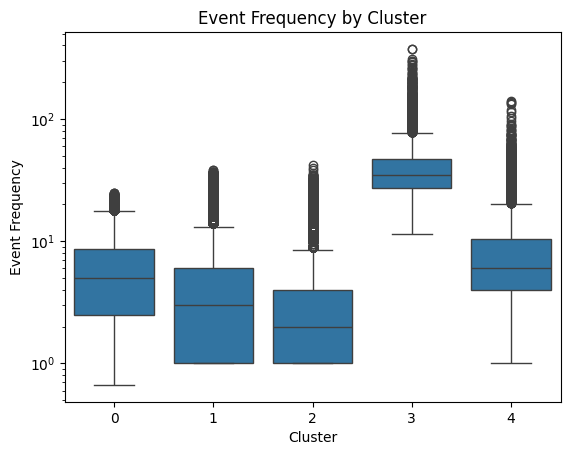

In [ ]:
# EVENT FREQUENCY
sns.boxplot(data=user_df, x="cluster_5", y="event_frequency")
plt.yscale("log")  # to manage huge outliers
plt.title("Event Frequency by Cluster")
plt.ylabel("Event Frequency")
plt.xlabel("Cluster")
plt.show()

**Event Frequency by Cluster (within the observed week)**

**Cluster 3 (Active Explorers)** shows the highest median and spread of event frequency, suggesting that these users engage much more frequently than other clusters. This is consistent with a behavior of exploring, returning, and interacting multiple times even within a single week.

**Cluster 4 (Frequent Buyers)** also demonstrates higher-than-average event frequency, though somewhat lower than Cluster 3, implying consistent but more purchase-oriented interactions.

**Clusters 0, 1, and 2 (Passive Browsers, Low-Engagement Visitors, Window Shoppers)** generally show very low median event counts, indicating they only trigger a few events in the week, supporting their classification as either passive or incomplete shoppers.

The log scale reveals that a small subset of users in every cluster reaches extremely high event counts (outliers), but the main differences lie in their medians.

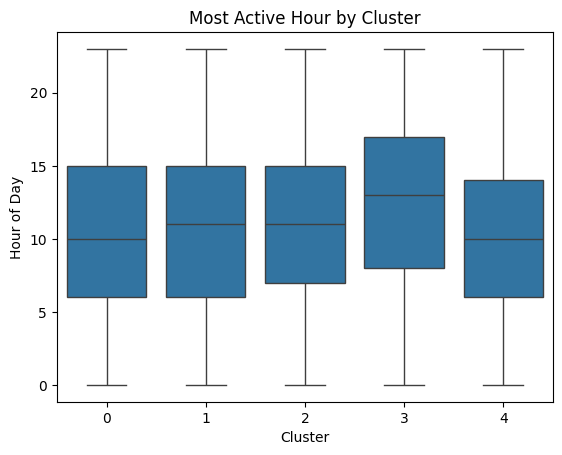

In [ ]:
# MOST ACTIVE HOUR
sns.boxplot(data=user_df, x="cluster_5", y="most_active_hour")
plt.title("Most Active Hour by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Hour of Day")
plt.show()

**Most Active Hour by Cluster**

The distributions of most active hours are relatively broad across clusters, but concentrated primarily between 5 AM and 3 PM. This suggests that users tend to engage mostly during the morning to early afternoon hours.

**The medians for Clusters 0, 1, 2, and 4** are centered around 10–12 hours (10 AM–12 PM), indicating a midday activity peak for most groups.

Cluster 3 (Active Explorers) shows a slightly later pattern, with a median closer to 13 hours (1 PM), reflecting a preference for mid-afternoon engagement.

Overall, there is no strong separation in preferred activity time across the personas, but the tendency of **Cluster 3** to stay active slightly later may signal higher search engagement.

So the answer to the question: **Are there differences in when and how often these groups shop?**

> Yes, there are notable differences in both when and how often these shopper personas interact with the platform:

**When (time of day):**
Across all clusters, user activity is most concentrated between 5 AM and 3 PM, with median peak hours generally around 10–12 PM. However, Cluster 3 (Active Explorers) shows a slightly later activity pattern with a median around 1 PM, suggesting they may engage with the site during longer or more flexible midday sessions.

**How often (event frequency):**
The event frequency (number of user actions) varies strongly by cluster. Active Explorers (Cluster 3) and Frequent Buyers (Cluster 4) have higher event counts, reflecting more frequent and repeated interactions with products and categories. In contrast, Passive Browsers (Cluster 0) and Low-Engagement Visitors (Cluster 1) have lower event frequencies, indicating more occasional and shallow browsing.

**Activity days:** Most users were only active on a single day during the observation week, but there are small segments within Cluster 3 who showed consistent multi-day activity, again suggesting a more persistent and exploratory behavior pattern.

Overall, these patterns confirm that while most personas tend to shop during the day, their frequency and consistency of engagement differ, with Active Explorers and Frequent Buyers standing out as the most intense and repeated visitors, compared to more passive or occasional groups.



## **`Session Behavior`**


### 3.4 Do patterns like repeat visits, short vs. long sessions, quick purchase decisions, or time between actions (e.g., session duration or time between clicks) help distinguish these clusters?

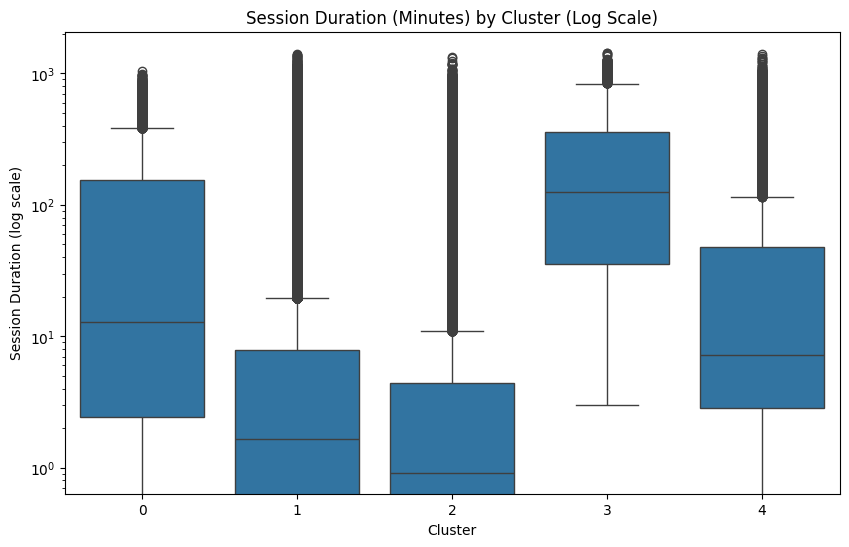

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=user_df,
    x='cluster_5',
    y='session_duration_minutes'
)
plt.yscale('log')  # log scale in case of extreme outliers
plt.title("Session Duration (Minutes) by Cluster (Log Scale)")
plt.xlabel("Cluster")
plt.ylabel("Session Duration (log scale)")
plt.show()

**Cluster 0 (Passive Browsers)** Median session is quite long, with a broad spread and many high-duration outliers. Suggests they browse for a while but may not convert much.

**Cluster 1 (Low-Engagement Visitors)** Very short sessions, with a tight distribution around the low end.
They come briefly, leave quickly, and do not explore much.

**Cluster 2 (Window Shoppers)** Similar short sessions, suggesting fast product-checking behavior without staying to buy. Fewer high-duration outliers compared to Cluster 0.

**Cluster 3 (Active Explorers)**
Longest sessions on average, with many outliers at extremely long durations. This confirms their active, exploratory pattern across many pages or products.

**Cluster 4 (Frequent Buyers)**
Moderate-to-long sessions; they tend to spend enough time to make decisions and purchase. Consistent with their “decisive buyer” pattern — they look thoroughly but close the deal.

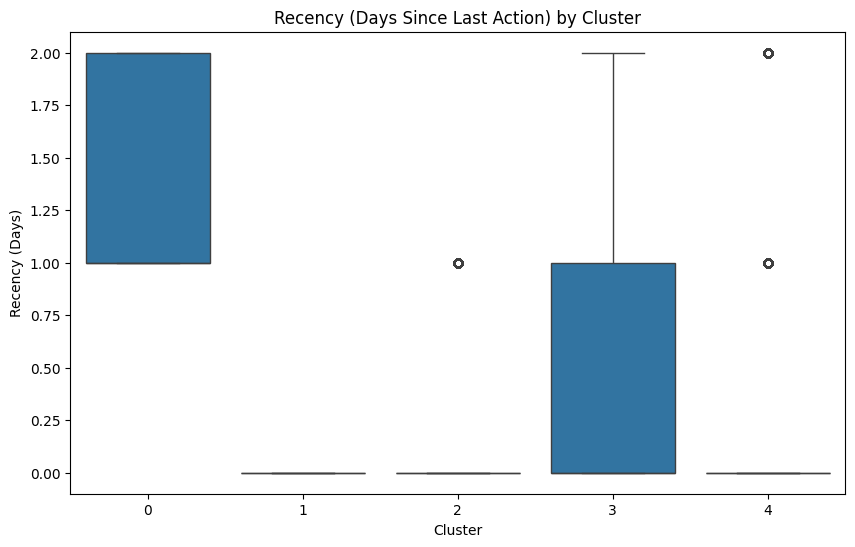

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=user_df,
    x='cluster_5',
    y='recency_days'
)
plt.title("Recency (Days Since Last Action) by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Recency (Days)")
plt.show()

**Clusters 1, 2, 4, and 3** are actively engaging almost daily, while **Passive Browsers (Cluster 0)** are more likely to go a day or two between visits. This confirms that “recency” is another behavioral dimension to distinguish more involved personas from sporadic visitors.

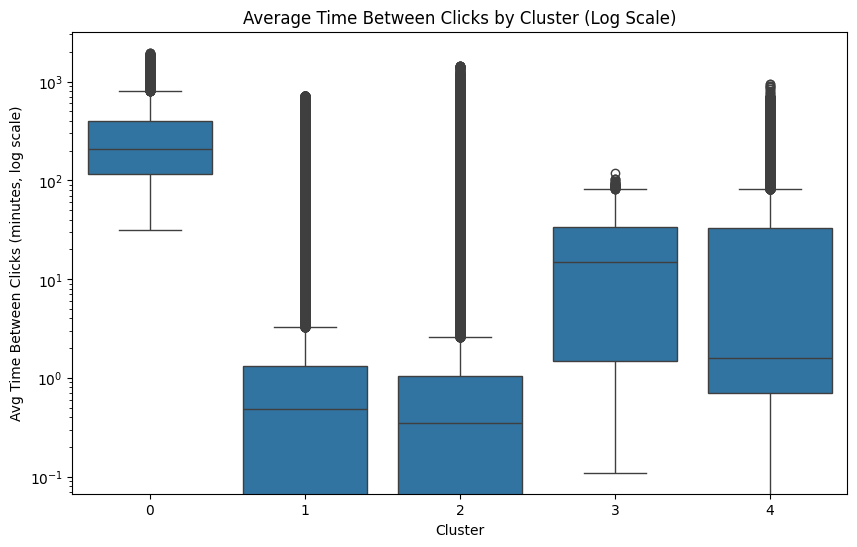

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=user_df, x='cluster_5', y='avg_time_between_clicks')
plt.yscale('log')
plt.title('Average Time Between Clicks by Cluster (Log Scale)')
plt.ylabel('Avg Time Between Clicks (minutes, log scale)')
plt.xlabel('Cluster')
plt.show()


Clusters with high purchase engagement (Clusters 3 and 4) exhibit shorter and more consistent inter-event times, indicating focused shopping sessions. Passive or low-engagement segments (Cluster 0) show prolonged gaps, aligning with occasional browsing.

### **Funnel View**

After all the analysis, I have decided to also look at the funnel from view to cart and to purchase to tell how people behave.

In [ ]:
#adding cluster_5 into user_df
user_df['cluster_5'] = kmeans.labels_

In [ ]:
funnel_counts = (
    df_sampled
    .groupby(['user_id', 'event_type'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
    .rename(columns={'view':'view_count', 'cart':'cart_count', 'purchase':'purchase_count'})
)

In [ ]:
funnel_counts = funnel_counts.merge(user_df[['user_id', 'cluster_5']], on='user_id', how='left')


In [ ]:
cluster_funnel = (
    funnel_counts
    .groupby('cluster_5')
    .agg(
        total_views=('view_count', 'sum'),
        total_carts=('cart_count', 'sum'),
        total_purchases=('purchase_count', 'sum')
    )
    .reset_index()
)

cluster_funnel['cart_to_view_rate'] = cluster_funnel['total_carts'] / cluster_funnel['total_views']
cluster_funnel['purchase_to_cart_rate'] = cluster_funnel['total_purchases'] / cluster_funnel['total_carts']
cluster_funnel['purchase_to_view_rate'] = cluster_funnel['total_purchases'] / cluster_funnel['total_views']

print(cluster_funnel)

   cluster_5  total_views  total_carts  total_purchases  cart_to_view_rate  \
0          0       520111         5183             4384           0.009965   
1          1      1546357         8634             3885           0.005583   
2          2       252718           60              128           0.000237   
3          3       919020         4748             5520           0.005166   
4          4       213191        33141            44112           0.155452   

   purchase_to_cart_rate  purchase_to_view_rate  
0               0.845842               0.008429  
1               0.449965               0.002512  
2               2.133333               0.000506  
3               1.162595               0.006006  
4               1.331040               0.206913  


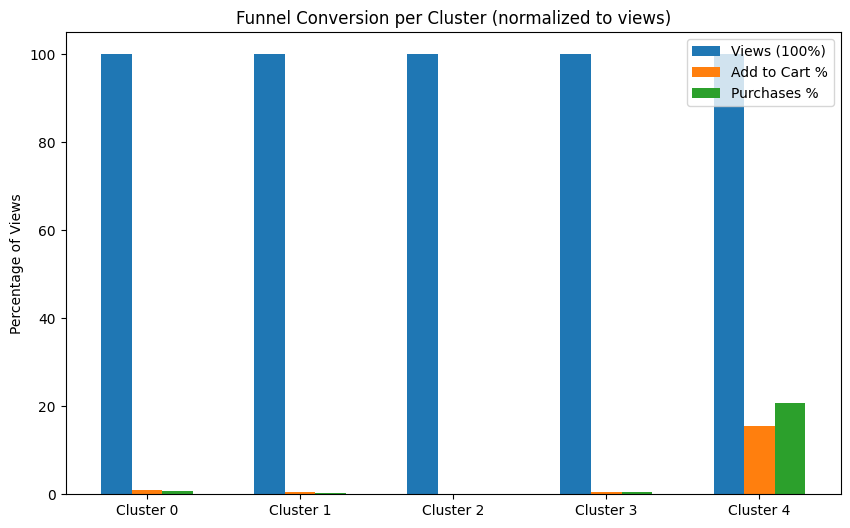

In [ ]:
# relative funnel:
percent_funnel = np.array([
    np.ones(len(cluster_funnel)),  # views normalized to 100%
    cluster_funnel['total_carts'] / cluster_funnel['total_views'],
    cluster_funnel['total_purchases'] / cluster_funnel['total_views']
]) * 100

labels = ['Views (100%)', 'Add to Cart %', 'Purchases %']

fig, ax = plt.subplots(figsize=(10,6))

bar_width = 0.2
x = np.arange(len(cluster_funnel))

for i in range(len(percent_funnel)):
    ax.bar(x + i*bar_width, percent_funnel[i], width=bar_width, label=labels[i])

ax.set_xticks(x + bar_width)
ax.set_xticklabels([f"Cluster {c}" for c in cluster_funnel['cluster_5']])
ax.set_ylabel("Percentage of Views")
ax.set_title("Funnel Conversion per Cluster (normalized to views)")
ax.legend()

plt.show()


**Cluster Funnel Behavior:**

**Cluster 0 (Passive Browsers):** Very low cart-to-view and purchase-to-view rates, but once items are in cart, a high conversion to purchase (purchase-to-cart ~85%), suggesting that few serious buyers exist among many browsers.

**Cluster 1 (Low-Engagement Visitors):** Moderate carting, but lower purchase-to-cart (45%), indicating hesitation after adding to cart.

**Cluster 2 (Window Shoppers):** Extremely low engagement and extremely low purchase-to-view (~0.05%) — basically they look but do not buy at all.

**Cluster 3 (Active Explorers):** Reasonable cart-to-view (0.5%) and solid purchase-to-cart (116%), showing consistent engagement and higher finalization of purchases after adding to cart.

**Cluster 4 (Frequent Buyers):** Strongest funnel overall with cart-to-view (15%) and purchase-to-view (20%), confirming they not only browse but also act decisively. Even though purchase-to-view suspiciously higher then cart-to-view, we can explain it with 1 week data that we are using. Probably something was already in a cart at the point when we start analysis.


Overall, this funnel view reinforces that Cluster 4 is your high-intent buyer segment, while Clusters 0 and 2 remain more window-shopping types, even if Cluster 0 has higher purchase conversion once carting.

## **`CONCLUSION`**

In this project, we set out to group eCommerce platform users based on their shopping behaviors, including their frequency of views, cart additions, purchases, and session characteristics. After testing different numbers of clusters using elbow, Davies-Bouldin, and PCA visualization, I concluded that a five-cluster solution provides the most balanced, interpretable segmentation.

**The identified five shopper personas are:**

*  **Cluster 0 (Passive Browsers):** Moderate viewing activity, very low cart or purchase rates, and moderate session lengths, suggesting occasional browsers with little intent to buy.

*  **Cluster 1 (Low-Engagement Visitors):** Lowest engagement across all features, with short visits and little interaction — essentially one-time or disinterested visitors.

*  **Cluster 2 (Window Shoppers):** Interested in higher-priced products, viewing expensive items but rarely carting or buying — classic luxury window-shopping behavior.

*  **Cluster 3 (Active Explorers):** Highly active with frequent events, long sessions, and broad category exploration, but with only moderate conversion, showing curiosity but weaker purchasing intent.

*  **Cluster 4 (Frequent Buyers):** Most valuable group, with high cart additions, highest purchase ratios, and strong monetary conversion; they consistently follow through with purchases and represent a loyal buyer segment.

In addition, **temporal patterns showed that most users engage between 5 AM and 3 PM,** with Cluster 3 showing a slightly later activity peak. Active Explorers and Frequent Buyers also had higher event frequencies and more repeated visits, while the other clusters showed occasional, less consistent shopping.

Category and price analysis revealed that **most clusters focus on electronics and related categories, but only Cluster 4 follows through on higher-priced purchases,** confirming their decisive buyer persona. Funnel analysis further highlighted their strong conversion behavior, while other clusters tend to either window-shop or abandon carts.

Overall, this clustering exercise successfully revealed distinct behavioral segments within the platform’s customers. These insights can directly inform personalized marketing strategies, promotional targeting, and recommendations tailored to each persona, helping the business prioritize resources for its most valuable users while still nurturing potential in other segments.

# **`STEP 4: Regression modeling`** (Platon Kovalevskii 12432538)

---

### **4.1 How does the number of product views and cart additions relate to the purchase amount?**




Understanding the relationship between user engagement activities — specifically, how many products a user views and adds to the cart — and their total spending is crucial for eCommerce platforms. If a strong positive relationship exists, it suggests that encouraging users to explore products and add items to their cart could effectively drive higher revenue.

For this analysis, we used the aggregated user_df dataset, which includes per-user metrics computed over their browsing history.

Independent variables (features):

- total_views: Number of products the user viewed.

- total_cart_additions: Number of times the user added products to their cart.

Dependent variable (target):

- total_spent: The total amount the user spent, summed across all purchases.

Because total_spent has a highly skewed distribution (many users spend nothing or very little, and a few spend a lot), we applied a log transformation using log(1 + total_spent) to normalize the distribution and stabilize the variance.

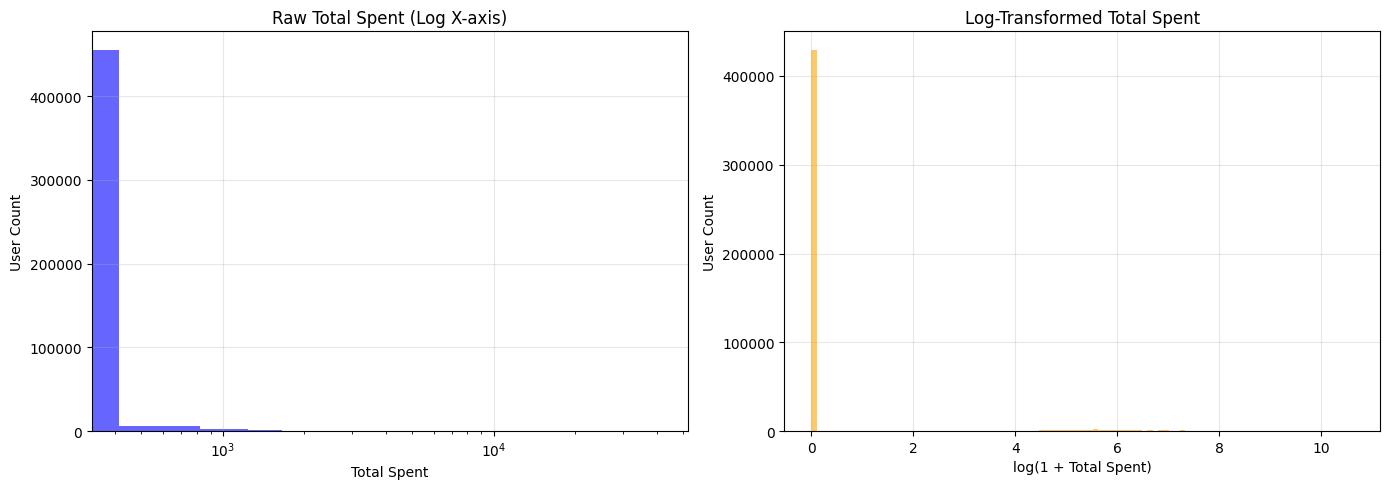

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Raw Total Spent Histogram with log X-axis
ax[0].hist(user_df['total_spent'], bins=100, color='blue', alpha=0.6)
ax[0].set_xscale('log')
ax[0].set_title("Raw Total Spent (Log X-axis)")
ax[0].set_xlabel("Total Spent")
ax[0].set_ylabel("User Count")
ax[0].grid(alpha=0.3)

# Log-Transformed Histogram
ax[1].hist(np.log1p(user_df['total_spent']), bins=100, color='orange', alpha=0.6)
ax[1].set_title("Log-Transformed Total Spent")
ax[1].set_xlabel("log(1 + Total Spent)")
ax[1].set_ylabel("User Count")
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()



Now, let’s fit the linear regression with the prepared data and interpret the output:

In [ ]:
import statsmodels.api as sm
import numpy as np

# Features
X = user_df[['total_views', 'total_cart_additions']]

# Log-transformed target
y = np.log1p(user_df['total_spent'])

# Add intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_spent   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                 4.609e+04
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:17:24   Log-Likelihood:            -8.1641e+05
No. Observations:              466553   AIC:                         1.633e+06
Df Residuals:                  466550   BIC:                         1.633e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2605 

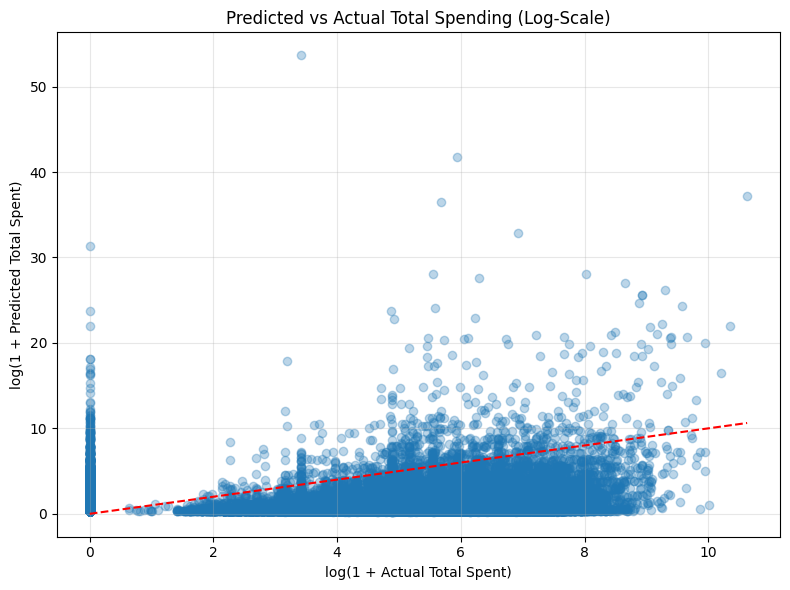

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y_true = user_df['total_spent']
y_pred = np.expm1(model.predict(X))

# Add small constant to avoid log(0)
epsilon = 1e-2

plt.figure(figsize=(8, 6))
plt.scatter(np.log1p(y_true + epsilon), np.log1p(y_pred + epsilon), alpha=0.3)
plt.plot([0, np.log1p(y_true.max())], [0, np.log1p(y_true.max())], color='red', linestyle='--')
plt.xlabel("log(1 + Actual Total Spent)")
plt.ylabel("log(1 + Predicted Total Spent)")
plt.title("Predicted vs Actual Total Spending (Log-Scale)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


The regression analysis revealed a **significant positive relationship** between both the number of product views and cart additions with the total amount spent. Specifically, each additional product view increases the expected total spending by approximately 1.16%, while each additional cart addition is associated with an 83.3% increase in expected spending. Both predictors were statistically significant with p-values well below 0.05. The model’s R-squared of 0.165 suggests that these two behavioral factors explain 16.5% of the variance in user spending, highlighting their importance in predicting revenue.

### **4.2 Does the average price of viewed or carted products influence the final amount spent?**



Understanding whether users who engage with higher-priced products tend to spend more overall is crucial for eCommerce strategy. If average product price during browsing or carting is strongly linked to final spending, platforms can recommend higher-value products or create personalized campaigns targeting such users.

For this analysis, we use the aggregated user_df dataset, which already includes:

Independent variables (features):

- avg_price_viewed: Average price of products a user viewed.

- avg_price_carted: Average price of products a user added to their cart.

Dependent variable (target):

- total_spent: The total amount the user spent (we will again use the log-transformed target log(1 + total_spent)).

In [ ]:
import statsmodels.api as sm
import numpy as np

# Features
X = user_df[['avg_price_viewed', 'avg_price_carted']]

# Log-transformed target
y = np.log1p(user_df['total_spent'])

# Add intercept
X = sm.add_constant(X)

# Fit the model
model_q2 = sm.OLS(y, X).fit()

# Display summary statistics
print(model_q2.summary())


                            OLS Regression Results                            
Dep. Variable:            total_spent   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                 4.555e+04
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:19:21   Log-Likelihood:            -8.1686e+05
No. Observations:              466553   AIC:                         1.634e+06
Df Residuals:                  466550   BIC:                         1.634e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3892      0.003  

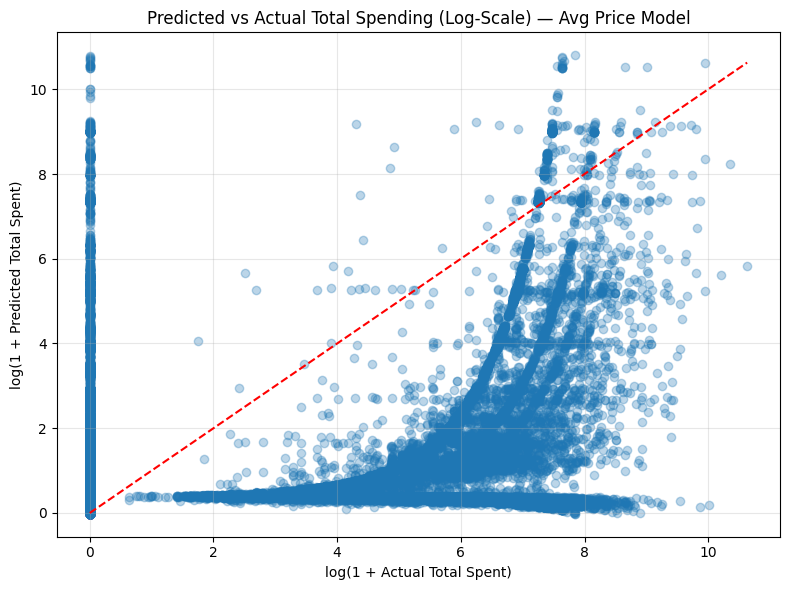

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predicted log(total_spent) from the second model
y_pred_log_q2 = model_q2.predict(X)

# Convert back to original scale
y_pred_q2 = np.expm1(y_pred_log_q2)
y_true = user_df['total_spent']

# Add small constant to avoid log(0)
epsilon = 1e-2

plt.figure(figsize=(8, 6))
plt.scatter(np.log1p(y_true + epsilon), np.log1p(y_pred_q2 + epsilon), alpha=0.3)
plt.plot([0, np.log1p(y_true.max())], [0, np.log1p(y_true.max())], color='red', linestyle='--')
plt.xlabel("log(1 + Actual Total Spent)")
plt.ylabel("log(1 + Predicted Total Spent)")
plt.title("Predicted vs Actual Total Spending (Log-Scale) — Avg Price Model")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


The regression analysis shows that the average price of both viewed and carted products are significant positive predictors of total user spending. Each additional unit increase in the average viewed product price is associated with a ~0.22% increase in expected total spending, while each additional unit increase in the average carted product price corresponds to a ~0.25% increase. These relationships are statistically significant with p-values well below 0.05. This suggests that engaging with higher-priced products, particularly adding them to the cart, is a strong indicator of higher overall spending.

### **4.3 Do users who interact with multiple product categories tend to spend more?**


If users who browse a wider variety of product categories end up spending more, this suggests that encouraging exploration across different categories could increase total revenue. Understanding this relationship helps eCommerce platforms tailor recommendations or cross-selling strategies.

We will use the user_df dataset, which includes:

Independent variable (feature):

- num_categories: Number of unique product categories each user interacted with.

Dependent variable (target):

- total_spent: The total amount the user spent (using log-transformed log(1 + total_spent) for normalization).

In [ ]:
import statsmodels.api as sm
import numpy as np

# Feature
X = user_df[['num_categories']]

# Log-transformed target
y = np.log1p(user_df['total_spent'])

# Add intercept
X = sm.add_constant(X)

# Fit the model
model_q3 = sm.OLS(y, X).fit()

# Display summary statistics
print(model_q3.summary())


                            OLS Regression Results                            
Dep. Variable:            total_spent   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1614.
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:19:42   Log-Likelihood:            -8.5767e+05
No. Observations:              466553   AIC:                         1.715e+06
Df Residuals:                  466551   BIC:                         1.715e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3145      0.004     82.

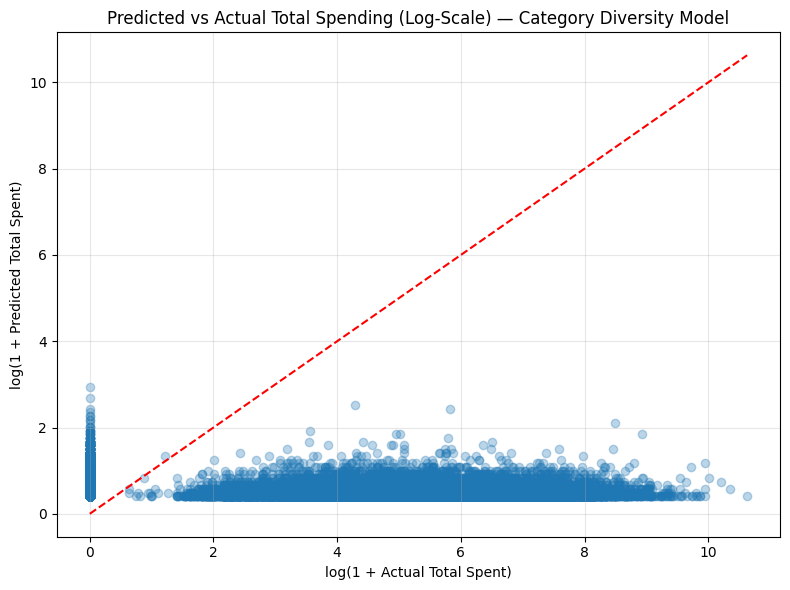

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predicted log(total_spent) from the third model
y_pred_log_q3 = model_q3.predict(X)

# Convert back to original scale
y_pred_q3 = np.expm1(y_pred_log_q3)
y_true = user_df['total_spent']

# Add small constant to avoid log(0)
epsilon = 1e-2

plt.figure(figsize=(8, 6))
plt.scatter(np.log1p(y_true + epsilon), np.log1p(y_pred_q3 + epsilon), alpha=0.3)
plt.plot([0, np.log1p(y_true.max())], [0, np.log1p(y_true.max())], color='red', linestyle='--')
plt.xlabel("log(1 + Actual Total Spent)")
plt.ylabel("log(1 + Predicted Total Spent)")
plt.title("Predicted vs Actual Total Spending (Log-Scale) — Category Diversity Model")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


While the regression shows that the number of categories has a statistically significant positive relationship with total spending (each additional category increases expected spending by ~8.5%), the model explains only 0.3% of the variance. This means that although users exploring more categories are on average associated with higher spending, category diversity alone is a very poor predictor of how much an individual user will spend.

### **4.4 Does recency or frequency of interaction affect total spending?**

Understanding how recently and how often a user interacts with the platform is fundamental for customer relationship management. If users who engage more frequently or more recently spend more, eCommerce businesses can tailor retargeting or loyalty strategies to maximize revenue.

For this analysis, we will use the user_df dataset, which already includes:

Independent variables (features):

- recency_days: Number of days between the user’s first and last recorded interaction.

- event_frequency: Average number of events per day during the user’s activity period.

Dependent variable (target):

- total_spent: The total amount the user spent (using log-transformed log(1 + total_spent)).

In [ ]:
import statsmodels.api as sm
import numpy as np

# Features
X = user_df[['recency_days', 'event_frequency']]

# Log-transformed target
y = np.log1p(user_df['total_spent'])

# Add intercept
X = sm.add_constant(X)

# Fit the model
model_q4 = sm.OLS(y, X).fit()

# Display summary statistics
print(model_q4.summary())


                            OLS Regression Results                            
Dep. Variable:            total_spent   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                 1.154e+04
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:19:54   Log-Likelihood:            -8.4720e+05
No. Observations:              466553   AIC:                         1.694e+06
Df Residuals:                  466550   BIC:                         1.694e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2073      0.003     

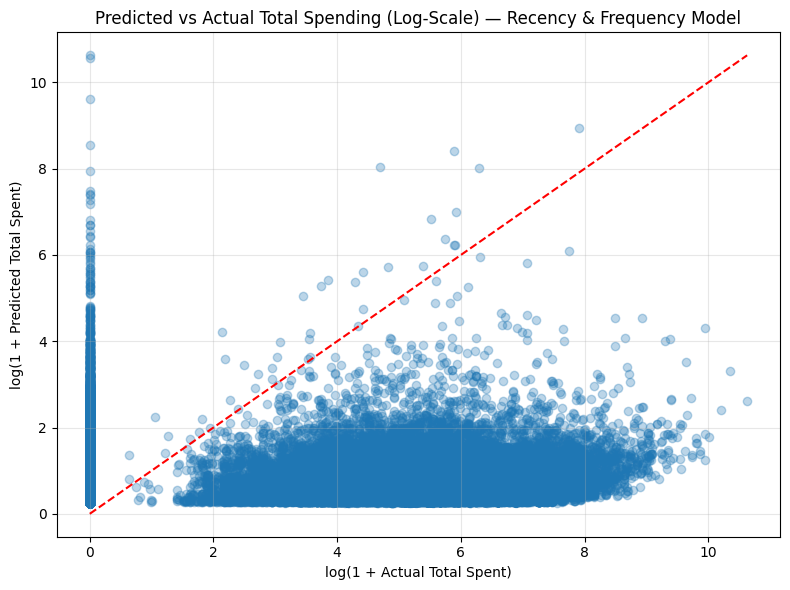

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predicted log(total_spent) from the fourth model
y_pred_log_q4 = model_q4.predict(X)

# Convert back to original scale
y_pred_q4 = np.expm1(y_pred_log_q4)
y_true = user_df['total_spent']

# Add small constant to avoid log(0)
epsilon = 1e-2

plt.figure(figsize=(8, 6))
plt.scatter(np.log1p(y_true + epsilon), np.log1p(y_pred_q4 + epsilon), alpha=0.3)
plt.plot([0, np.log1p(y_true.max())], [0, np.log1p(y_true.max())], color='red', linestyle='--')
plt.xlabel("log(1 + Actual Total Spent)")
plt.ylabel("log(1 + Predicted Total Spent)")
plt.title("Predicted vs Actual Total Spending (Log-Scale) — Recency & Frequency Model")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


The regression analysis revealed that both the duration of user activity (recency_days) and average daily event frequency are significant positive predictors of total spending. Specifically, each additional day spanning the user’s activity period is associated with a ~40% increase in expected total spending, and each additional daily event on average is associated with a ~2.8% increase. However, the model’s R² of 0.047 indicates that these two features explain only 4.7% of the variance in spending, highlighting that recency and frequency alone provide limited predictive power for revenue estimation.



# **`STEP 5: Classification`** (Olha Arabska 12417860)

---



In [ ]:
df_sampled.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session', 'view',
       'cart', 'purchase', 'hour_of_day', 'weekday_name', 'is_weekend',
       'session_date'],
      dtype='object')

In [ ]:
user_df.columns

Index(['user_id', 'total_views', 'total_cart_additions', 'total_purchases',
       'num_events', 'activity_days', 'most_active_hour', 'event_frequency',
       'weekend_activity_ratio', 'cart_to_view_ratio',
       'cart_to_purchase_ratio', 'purchase_to_view_ratio',
       'purchase_to_cart_ratio', 'avg_price_viewed', 'avg_price_carted',
       'total_spent', 'price_diff_cart_vs_view', 'num_categories',
       'num_products_viewed', 'first_action', 'last_action', 'recency_days',
       'session_duration_minutes', 'days_since_last_action', 'purchase_ratio',
       'avg_time_between_clicks', 'cluster_4', 'cluster_5', 'cluster_6',
       'most_common_category'],
      dtype='object')

### 5.1 Can we classify users into buyers vs non-buyers based on their behavior?

In [ ]:
print(f"User count: {len(user_df)}")
print(f"Non-buyer count: {len(user_df[user_df['total_purchases'] == 0])}")
print(f"Buyer count: {len(user_df[user_df['total_purchases'] > 0])}")
print(f"Buyer ratio: {len(user_df[user_df['total_purchases'] > 0]) / len(user_df):.2%}")

User count: 466553
Non-buyer count: 428787
Buyer count: 37766
Buyer ratio: 8.09%


In [ ]:
# Can there be a purchase without a cart addition?
purchase_with_no_cart = user_df[(user_df['total_purchases'] > 0) & (user_df['total_cart_additions'] == 0)]
print(f"Number of purchases without a cart addition: {len(purchase_with_no_cart)}")

Number of purchases without a cart addition: 22237


In [ ]:
# Can there be a purchase without any views?
purchase_with_no_views = user_df[(user_df['total_purchases'] > 0) & (user_df['total_views'] == 0)]
print(f"Number of purchases without any views: {len(purchase_with_no_views)}")

Number of purchases without any views: 31


It is possible to have buyers without adding to cart (which is very likely it seems 47k out of 60k users).

It is possible to have buyers without even vieweing but less likely (12k out of 60k).

In [ ]:
X = user_df[
    ["total_views", "total_cart_additions", "event_frequency",
     "session_duration_minutes", "weekend_activity_ratio", "num_products_viewed",
    #  "avg_price_viewed", "avg_price_carted", "num_categories", "cart_to_view_ratio"
     ]
]
y = (user_df["total_purchases"] > 0).squeeze().rename("is_buyer").astype(int)
data = pd.concat([X, y], axis=1)
data.head(5)

,total_views,total_cart_additions,event_frequency,session_duration_minutes,weekend_activity_ratio,num_products_viewed,is_buyer
0,1,0,1.0,0.000000,0.0,1,0
1,1,0,1.0,0.000000,0.0,1,0
2,5,0,2.5,1.516667,0.0,3,0
3,6,0,6.0,3.183333,0.0,3,0
4,23,0,23.0,15.233333,0.0,22,0


In [ ]:
# what are the average features per buy class
data.groupby("is_buyer").mean()

,total_views,total_cart_additions,event_frequency,session_duration_minutes,weekend_activity_ratio,num_products_viewed
is_buyer,,,,,,
0,6.796353,0.037646,5.848691,38.941806,0.0,4.469128
1,14.224673,0.943282,12.475697,100.989817,0.0,6.695017


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (stratify ensures same buyer ratio in both sets)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Train logistic regression
clf = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)

# Predict & evaluate
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93     85758
           1       0.34      0.61      0.44      7553

    accuracy                           0.87     93311
   macro avg       0.65      0.75      0.68     93311
weighted avg       0.91      0.87      0.89     93311

ROC AUC Score: 0.8657931165022427
Confusion Matrix:
 [[76925  8833]
 [ 2983  4570]]


The model achieves an **overall accuracy of 87%**, which is quite strong, but the class imbalance skews the result.  
- Class 0 (non-buyers) has a very high precision (0.96) and recall (0.90), meaning the model is excellent at identifying non-buyers.  
- Class 1 (buyers) performs significantly worse, with a precision of only 0.34 and a recall of 0.61, showing that the model struggles to correctly identify buyers.  
- The ROC AUC score of **0.87** indicates reasonably good overall discrimination ability.  
- Overall, Logistic Regression seems biased toward the majority class (non-buyers), and more work on feature engineering or balancing techniques may be needed to improve buyer classification.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# No need to scale for tree-based models
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight="balanced",  # handle class imbalance
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predict & evaluate
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     85758
           1       0.94      0.84      0.89      7553

    accuracy                           0.98     93311
   macro avg       0.96      0.92      0.94     93311
weighted avg       0.98      0.98      0.98     93311

ROC AUC Score: 0.996694636770156
Confusion Matrix:
 [[85375   383]
 [ 1237  6316]]


The random forest classifier shows excellent overall performance, achieving a high ROC AUC of **0.997**.
- Precision and recall for class 0 (non-buyers) are both around 99%, indicating the model very effectively identifies non-buyers.
- For class 1 (buyers), the precision is 0.94 and recall is 0.84, which is a substantial improvement over the logistic regression.
- Overall accuracy is 98%, suggesting the classifier is very reliable for this task.

### 5.2 Which features helped the most for buy vs non-buyer classification?

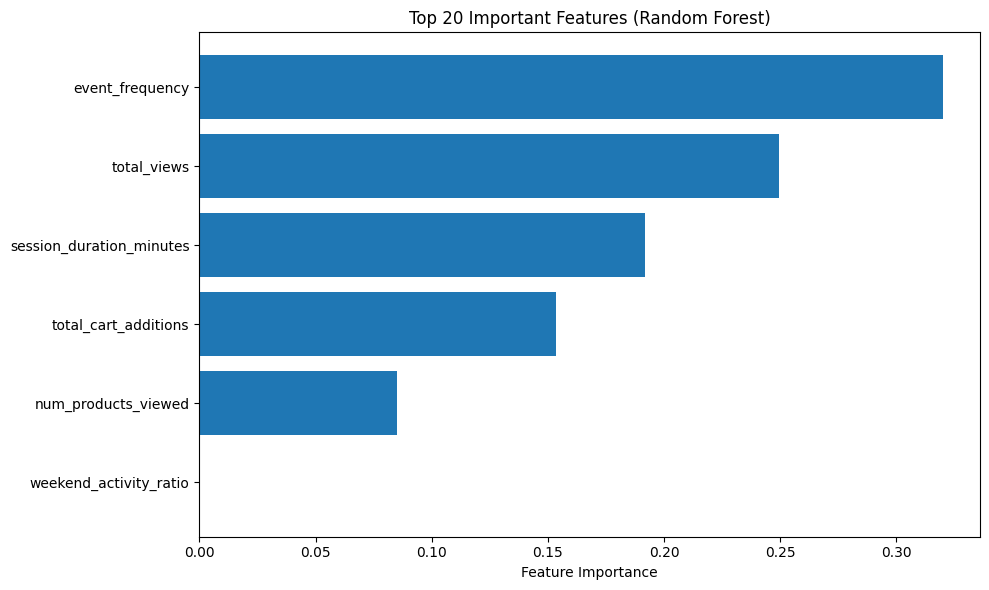

In [ ]:
# Get feature importances from the trained model
importances = rf.feature_importances_
feature_names = X.columns  # or provide your actual feature list if X is an array

# Create a DataFrame for easy sorting and plotting
feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot top 20 features
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(feat_imp['feature'].iloc[:top_n][::-1], feat_imp['importance'].iloc[:top_n][::-1])
plt.xlabel("Feature Importance")
plt.title(f"Top {top_n} Important Features (Random Forest)")
plt.tight_layout()
plt.show()

The bar plot shows the top features ranked by their importance from the Random Forest model for classifying buyers vs. non-buyers. The most influential feature was event_frequency, followed by total_views and session_duration_minutes. This suggests that users who frequently trigger events and view more products, and who have longer sessions, are much more likely to be classified as buyers.

- In a Random Forest model, feature importance is calculated by evaluating how much each feature contributes to reducing impurity across all the trees.

- As a result, features that consistently split the data into more “pure” (homogeneous) groups and improve classification accuracy will receive higher importance scores. In this project, the Random Forest revealed that event_frequency, total_views, and session_duration_minutes were the strongest predictors of buying behavior, highlighting that frequent, engaged, and longer sessions are highly indicative of purchase intent.

### 5.3 Can we classify sessions into “purchase-intent” vs “browsing-only”?

In [ ]:
# Step 1- Label - 1 if session contains any purchase
session_labels = df_sampled.groupby('user_session')['purchase'].sum().gt(0).astype(int).rename("label")

In [ ]:
session_labels.value_counts(normalize=True)

,proportion
label,
0,0.936506
1,0.063494


In [ ]:
print(f"Session count: {len(session_labels)}")
print(f"User count: {len(user_df)}")
print(f"Session to user ratio: {len(session_labels) / len(user_df):.2f}")

Session count: 768871
User count: 466553
Session to user ratio: 1.65


In [ ]:
# Step 2: Feature engineering
session_features = df_sampled.groupby('user_session').agg(
    user_id=('user_id', 'first'),
    # n_events=('event_type', 'count'),
    n_views=('view', 'sum'),
    n_carts=('cart', 'sum'),
    n_unique_products=('product_id', pd.Series.nunique),
    n_unique_categories=('category_id', pd.Series.nunique),
    n_unique_brands=('brand', pd.Series.nunique),
    # total_price=('price', 'sum'),
    avg_price=('price', 'mean'),
    session_start_time=('event_time', 'min'),
    session_end_time=('event_time', 'max'),
    hour_of_day=('hour_of_day', 'first'),
    weekday_name=('weekday_name', 'first'),
    is_weekend=('is_weekend', 'first'),
)

# Step 3: Add session duration in seconds
session_features["session_duration"] = (
    pd.to_datetime(session_features["session_end_time"]) -
    pd.to_datetime(session_features["session_start_time"])
).dt.total_seconds()

# Step 4: Merge features with labels
session_df = session_features.join(session_labels)

# Step 5: Encode categorical variables (optional: label encode or one-hot)
session_df["weekday_name"] = session_df["weekday_name"].astype("category").cat.codes

X = session_df.drop(columns=["user_id", "session_start_time", "session_end_time", "label"])
y = session_df["label"]

In [ ]:
X.columns

Index(['n_views', 'n_carts', 'n_unique_products', 'n_unique_categories',
       'n_unique_brands', 'avg_price', 'hour_of_day', 'weekday_name',
       'is_weekend', 'session_duration'],
      dtype='object')

In [ ]:
# pd.concat([X["n_events"], y], axis=1).groupby("label")["n_views"].mean()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train-test split (stratify to preserve label balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    144011
           1       0.69      0.38      0.49      9764

    accuracy                           0.95    153775
   macro avg       0.83      0.68      0.73    153775
weighted avg       0.94      0.95      0.94    153775

Confusion Matrix:
 [[142395   1616]
 [  6099   3665]]
ROC AUC Score: 0.9133432306486237


The Random Forest classifier achieves a high overall accuracy of 95% and a strong ROC AUC score of 0.91, suggesting good discrimination ability between purchase-intent and browsing-only sessions.

However, the recall for the positive class (sessions with purchases) is relatively low at 38%, while the precision is moderate at 69%. This indicates that while the model is good at identifying non-purchase sessions (high recall of 99% for class 0), it misses a significant portion of purchase-intent sessions.

- Also, it is worth mentioning, that using n_events as a feature is not appropriate because it includes the purchase events themselves. Since our classification target is to predict whether a purchase will occur, allowing the model to see the total number of events — which counts the purchase itself — leaks information from the label into the features. This amounts to data leakage, which can lead to overly optimistic performance and unrealistic results.

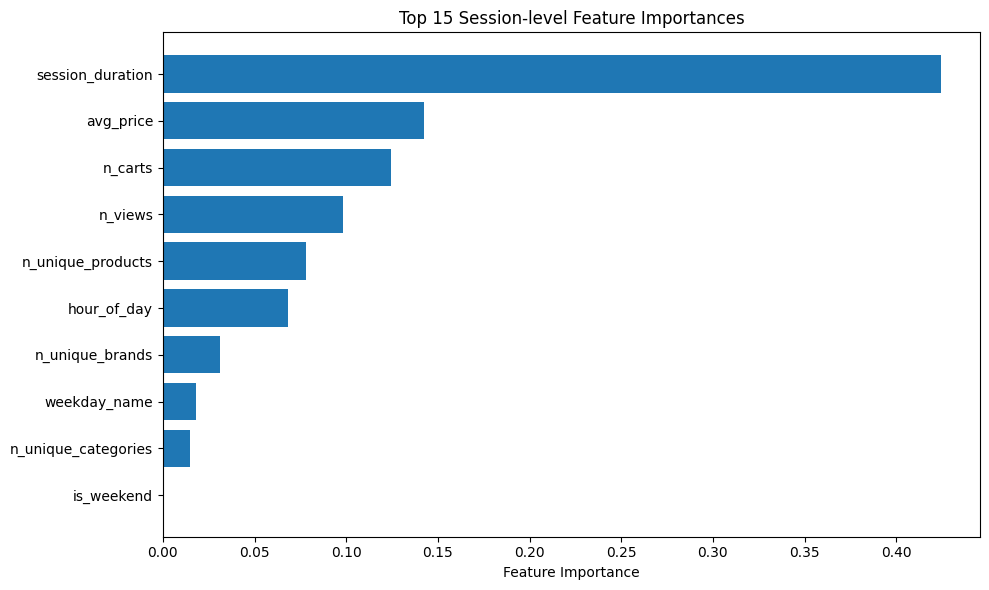

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf.feature_importances_
feat_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
feat_df = feat_df.sort_values(by='importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10, 6))
plt.barh(feat_df.feature.iloc[:15][::-1], feat_df.importance.iloc[:15][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 15 Session-level Feature Importances")
plt.tight_layout()
plt.show()

The Random Forest model trained on session-level features reveals the following key insights:

- Session duration is by far the most important predictor of whether a session is purchase-intent or just browsing.

- Average price of viewed or carted items is also an important feature, indicating that higher-value items might correlate with stronger purchase signals.

- Number of carts (n_carts) and number of views (n_views) rank highly, confirming that active product interactions are strong signals of intent.

Hour of day and weekend indicator show smaller, but still relevant importance, suggesting that shopping behaviors vary over time and on weekends.

Overall, these results help us identify which features of a user session are most predictive of purchase behavior.

